# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
import numpy as np
"""
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if Distance_Type == 'euclidean':
        distances = np.sqrt(((Data_points[:, np.newaxis] - Cluster_Centroids)**2).sum(axis=2))
    elif Distance_Type == 'pearson':
        data_mean = np.mean(Data_points, axis=0)
        centroid_mean = np.mean(Cluster_Centroids, axis=0)
        data_centered = Data_points - data_mean
        centroid_centered = Cluster_Centroids - centroid_mean
        numerator = np.sum(data_centered[:, np.newaxis] * centroid_centered, axis=2)
        denominator = np.sqrt(np.sum(data_centered**2, axis=1)[:, np.newaxis]) * np.sqrt(np.sum(centroid_centered**2, axis=1))
        distances = 1 - (numerator / denominator)
    else:
        
        print ("Distance_Type must be 'euclidean' or 'pearson'.")
    return distances
"""
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    if Distance_Type == 'euclidean':
        distances = np.sqrt(((Data_points[:, np.newaxis] - Cluster_Centroids)**2).sum(axis=2))
    elif Distance_Type == 'pearson':
        data_mean = np.mean(Data_points, axis=0)
        centroid_mean = np.mean(Cluster_Centroids, axis=0)
        data_centered = Data_points - data_mean
        centroid_centered = Cluster_Centroids - centroid_mean
        if data_centered.ndim < 2:
            data_centered = data_centered[:, np.newaxis]
        if centroid_centered.ndim < 2:
            centroid_centered = centroid_centered[:, np.newaxis]
        numerator = np.sum(data_centered[:, np.newaxis] * centroid_centered, axis=2)
        denominator = np.sqrt(np.sum(data_centered**2, axis=1)[:, np.newaxis]) * np.sqrt(np.sum(centroid_centered**2, axis=1))
        distances = 1 - (numerator / denominator)
    else:
        print("Distance_Type must be 'euclidean' or 'pearson'.")
        return None
    return distances

# Example usage:
# Generate sample data
np.random.seed(0)
Cluster_Centroids = np.random.rand(3, 2)
print(Cluster_Centroids)
Data_points = np.random.rand(5, 2)
print(Data_points)

# Calculate distances using Euclidean distance
distances_euclidean = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='euclidean')
print("Distances (Euclidean):")
print(distances_euclidean)

# Calculate distances using Pearson correlation distance
distances_pearson = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type='pearson')
print("\nDistances (Pearson correlation):")
print(distances_pearson)
    

        





[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]]
[[0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]]
Distances (Euclidean):
[[0.20869372 0.3842079  0.2462733 ]
 [0.53118409 0.39536284 0.60040816]
 [0.30612356 0.18963685 0.38621822]
 [0.2112843  0.38229325 0.31477278]
 [0.7891329  0.70162138 0.66072543]]

Distances (Pearson correlation):
[[0.21167127 1.94412576 0.54027424]
 [1.1359786  0.09347677 1.94878674]
 [0.86336434 0.24117412 1.99885025]
 [0.04016251 1.75561816 0.90081156]
 [1.86969673 0.94401461 0.35484138]]


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
""""
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    centroids = np.zeros((Number_of_Clusters, Data_points.shape[1])) 
    for col in range(Data_points.shape[1]):
        min_val = np.min(Data_points[:, col])
        max_val = np.max(Data_points[:, col])
        data_range = max_val - min_val
        centroids[:, col] = np.random.rand(Number_of_Clusters) * data_range + min_val

    tol = 0.1
    while True:  # Infinite loop until convergence
        cluster_distances = np.zeros((Number_of_Clusters, Data_points.shape[0]))
        for i in range(Number_of_Clusters):
            centroid_distances = GUC_Distance(centroids[i], Data_points, Distance_Type)
            cluster_distances[i] = centroid_distances.ravel()
            

        min_distance_indices = np.argmin(cluster_distances, axis=0)
        cluster_assignments = min_distance_indices

        mean_square_distances = np.zeros(Number_of_Clusters)
        for k in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignments == k]
            mean_values = np.mean(points_in_cluster, axis=0)
            centroids[k] = mean_values
            mean_square_distance = np.mean(np.sum((points_in_cluster - centroids[k])**2, axis=1))
            mean_square_distances[k] = mean_square_distance

        sum_mean_square_distances = np.sum(mean_square_distances)
        print(sum_mean_square_distances)
        if sum_mean_square_distances < tol:
            break  # Terminate the loop if convergence criterion met

    # Calculate the cluster metric (distortion)
    Cluster_Metric = sum_mean_square_distances  # Update based on your metric

    return cluster_assignments, centroids, Cluster_Metric
"""
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    centroids = np.zeros((Number_of_Clusters, Data_points.shape[1])) 
    for col in range(Data_points.shape[1]):
        min_val = np.min(Data_points[:, col])
        max_val = np.max(Data_points[:, col])
        data_range = max_val - min_val
        centroids[:, col] = np.random.rand(Number_of_Clusters) * data_range + min_val

    tol = 0.001
    prev_sum_mean_square_distances = float('inf')  
    while True: 
        cluster_distances = np.zeros((Number_of_Clusters, Data_points.shape[0]))
        for i in range(Number_of_Clusters):
            centroid_distances = GUC_Distance(centroids[i], Data_points, Distance_Type)
            cluster_distances[i] = centroid_distances.ravel()

        min_distance_indices = np.argmin(cluster_distances, axis=0)
        cluster_assignments = min_distance_indices

        mean_square_distances = np.zeros(Number_of_Clusters)
        for k in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignments == k]
            if len(points_in_cluster) == 0:  
                continue  
            mean_values = np.mean(points_in_cluster, axis=0)
            centroids[k] = mean_values
            mean_square_distance = np.mean(np.sum((points_in_cluster - centroids[k])**2, axis=1))
            mean_square_distances[k] = mean_square_distance

        sum_mean_square_distances = np.sum(mean_square_distances)

        if abs(prev_sum_mean_square_distances - sum_mean_square_distances) < tol:
            break  

        prev_sum_mean_square_distances = sum_mean_square_distances  # Update previous sum of mean squared distances
    Cluster_Metric = sum_mean_square_distances  # Update based on your metric

    return cluster_assignments, centroids, Cluster_Metric


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters

import matplotlib.pyplot as plt
"""
def display_cluster(X, km=[], num_clusters=0):
    color = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
    alpha = 0.5  # Color opacity
    s = 20  # Marker size
    
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km == i, 0], X[km == i, 1], c=color[i], alpha=alpha, s=s)
    
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Clustered Data')
    plt.show()
"""
import numpy as np
import matplotlib.pyplot as plt

def display_cluster(X, km=[], num_clusters=0):
    color = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
    alpha = 0.5  # Color opacity
    s = 20  # Marker size
    
    num_dimensions = X.shape[1]
    fig, axes = plt.subplots(num_dimensions, num_dimensions, figsize=(15, 15))
    
    for i in range(num_dimensions):
        for j in range(num_dimensions):
            ax = axes[i, j]
            if i == j:
                ax.set_visible(False)
            elif i < j:
                ax.scatter(X[:, j], X[:, i], c=color[0], alpha=alpha, s=s)
                if num_clusters > 0:
                    for k in range(num_clusters):
                        ax.scatter(X[km == k, j], X[km == k, i], c=color[k], alpha=alpha, s=s)
                ax.set_xlabel(f'Dimension {j+1}')
                ax.set_ylabel(f'Dimension {i+1}')
            else:
                ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

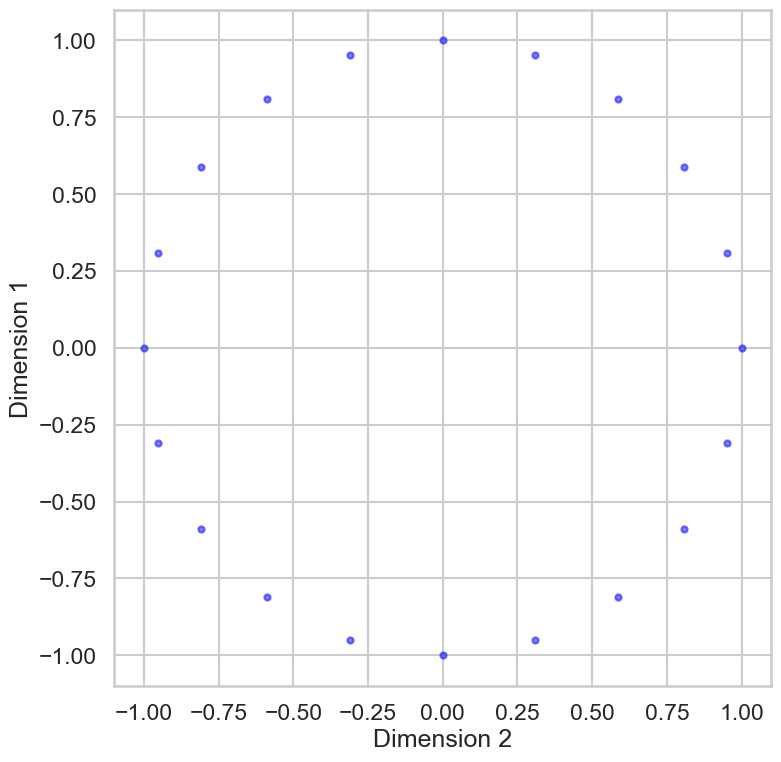

In [6]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

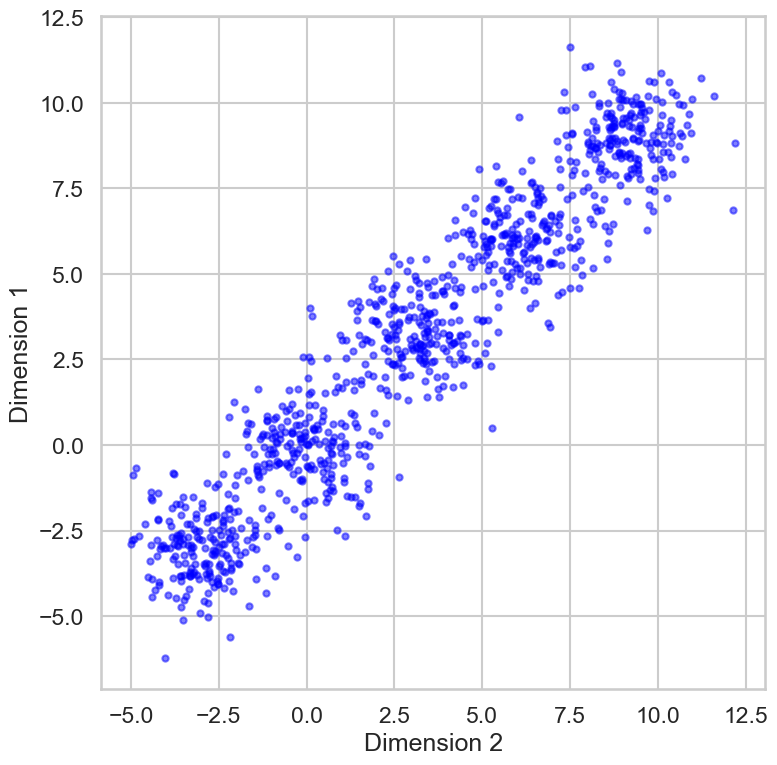

In [7]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

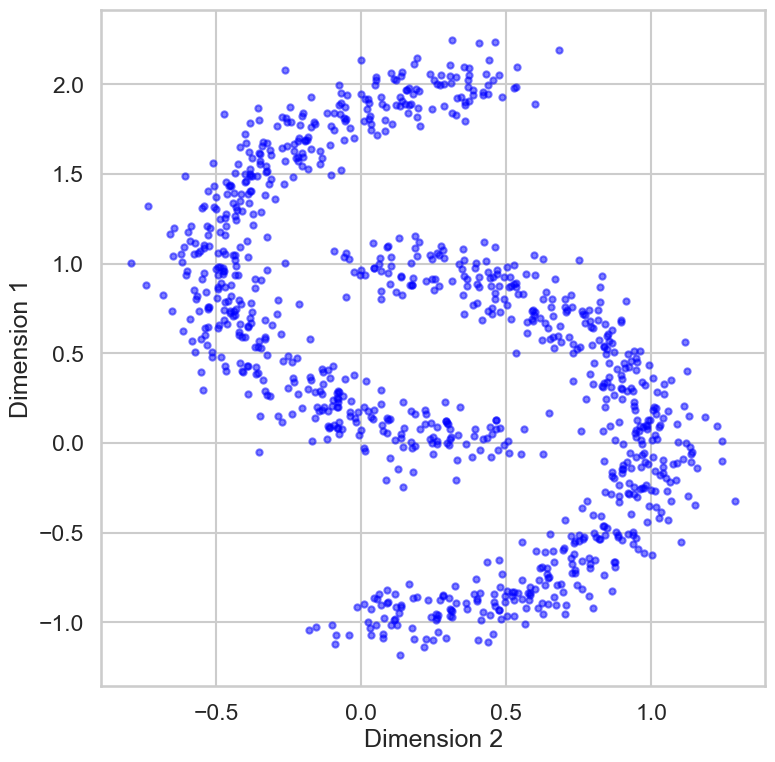

In [8]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

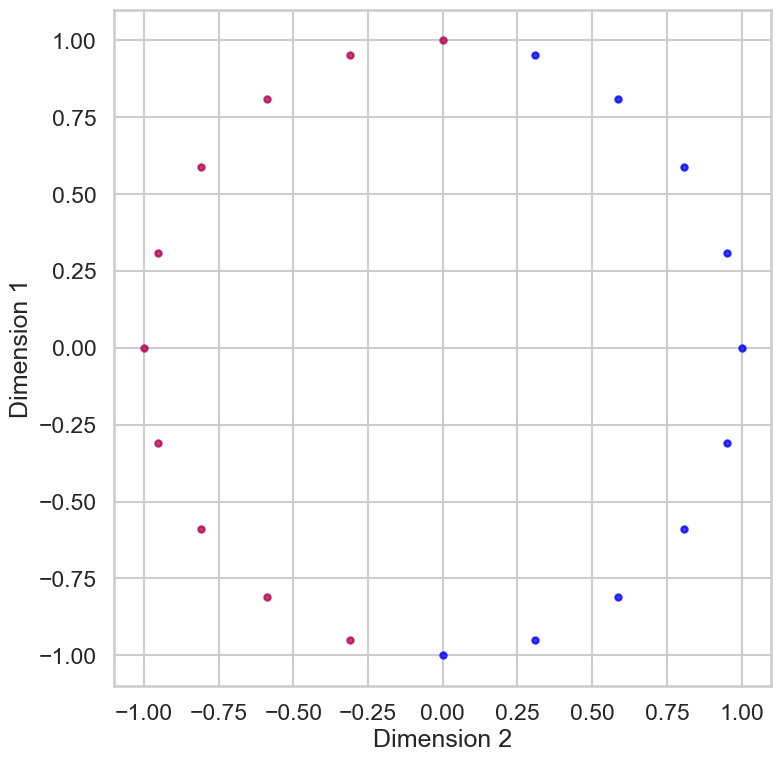

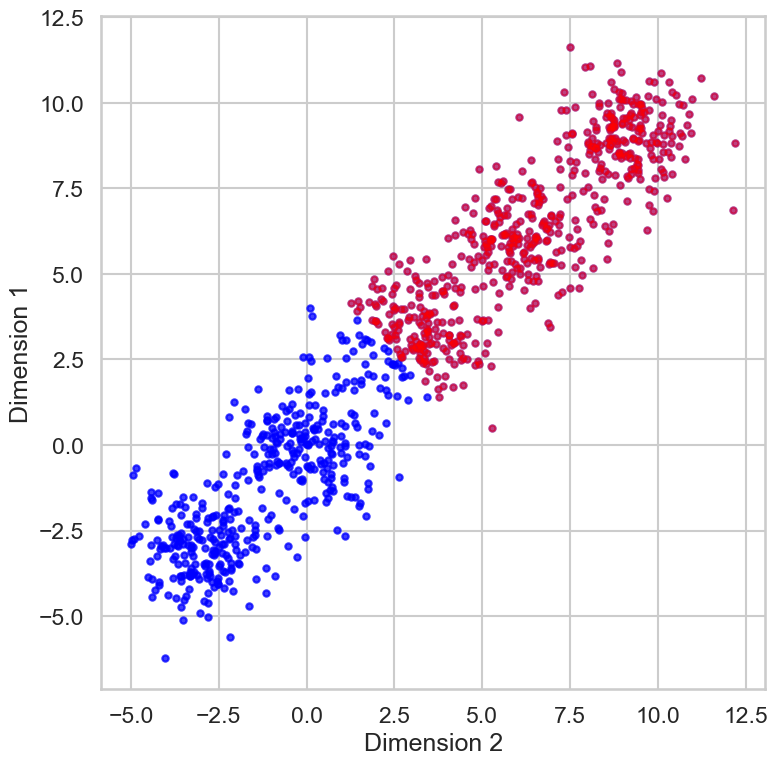

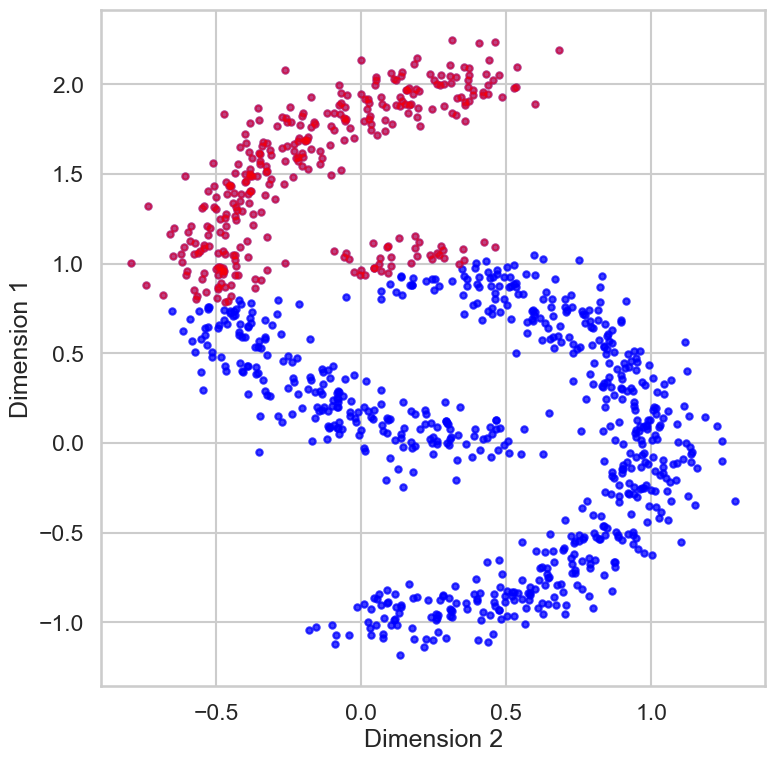

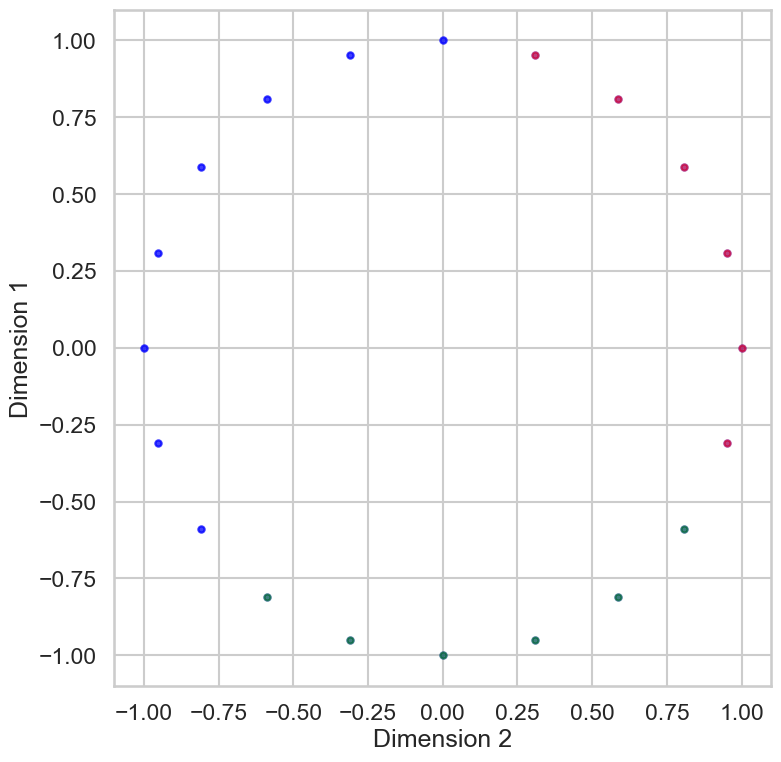

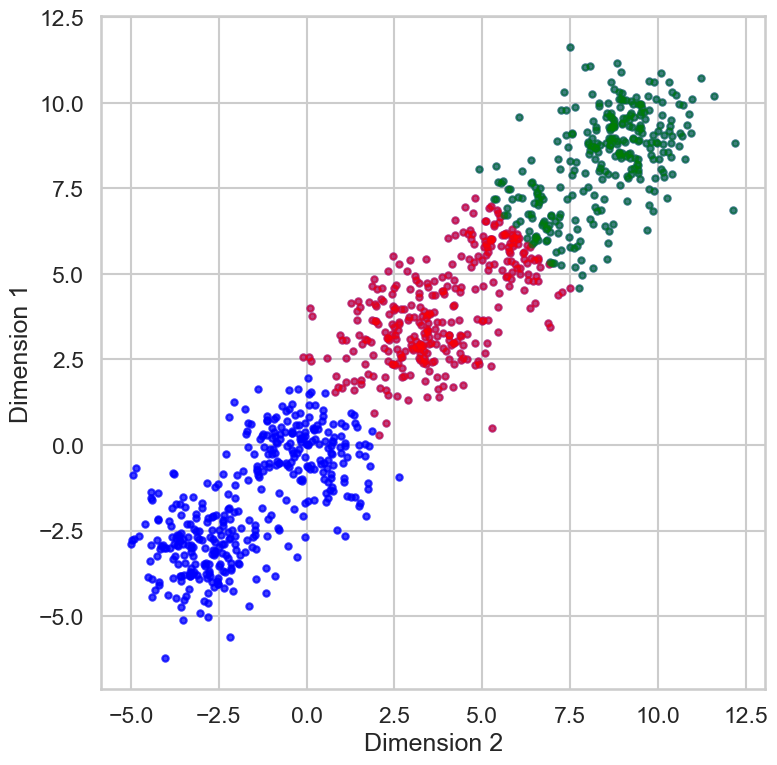

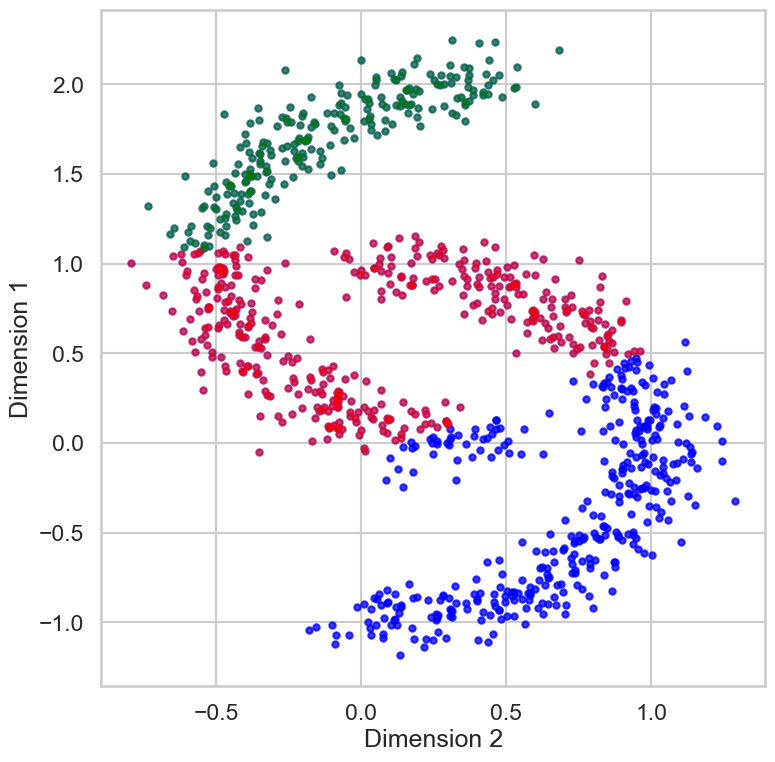

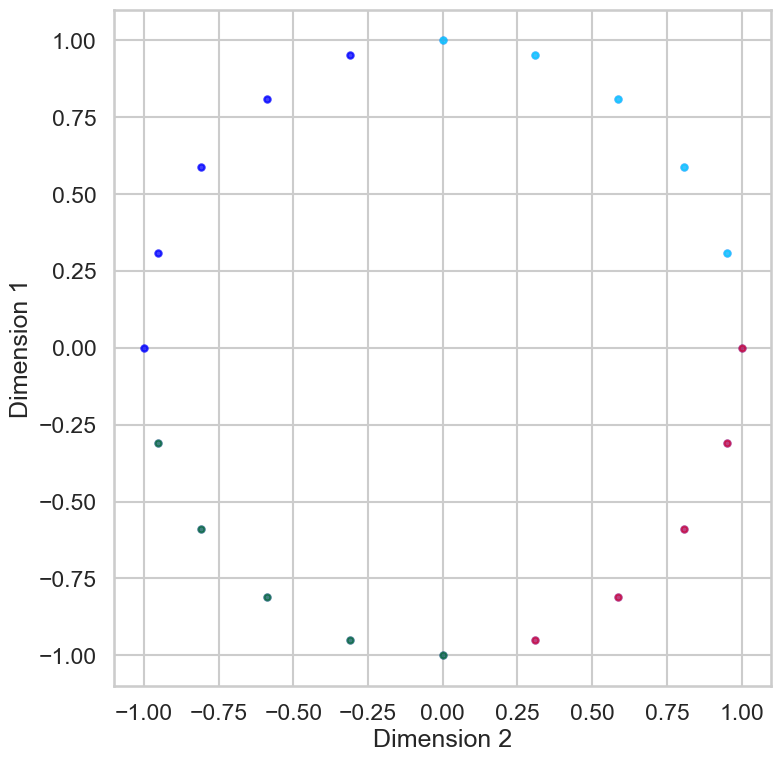

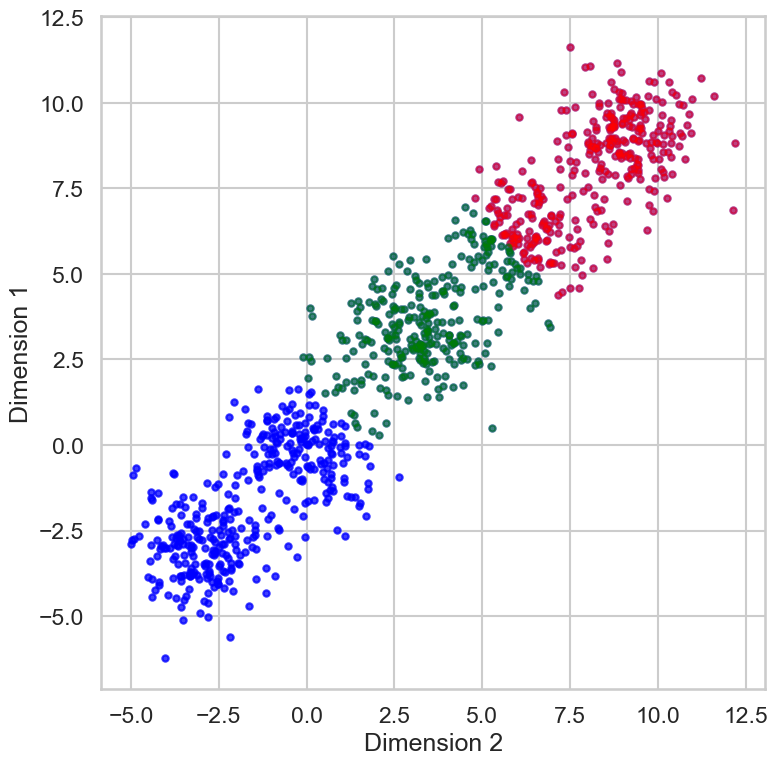

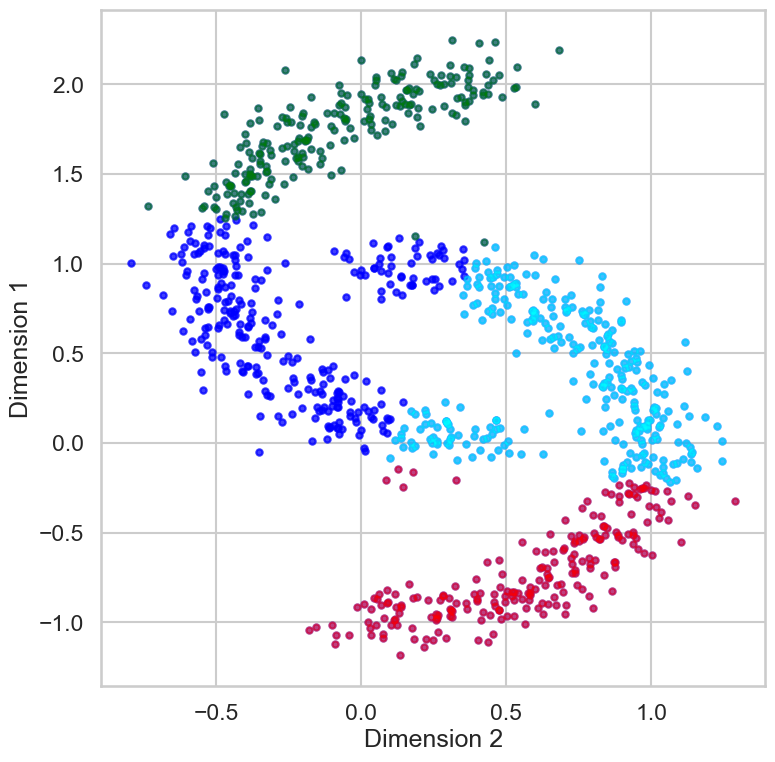

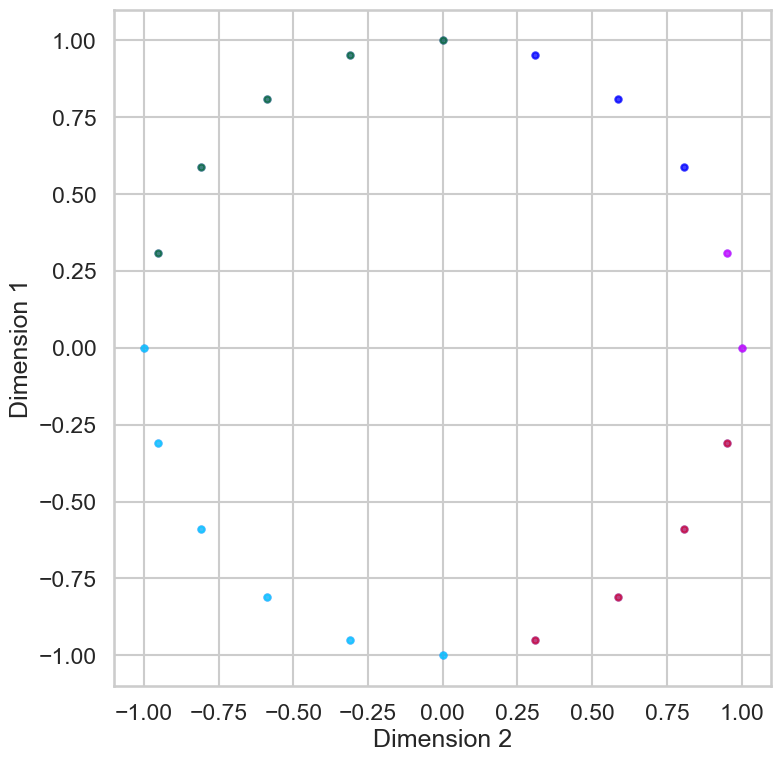

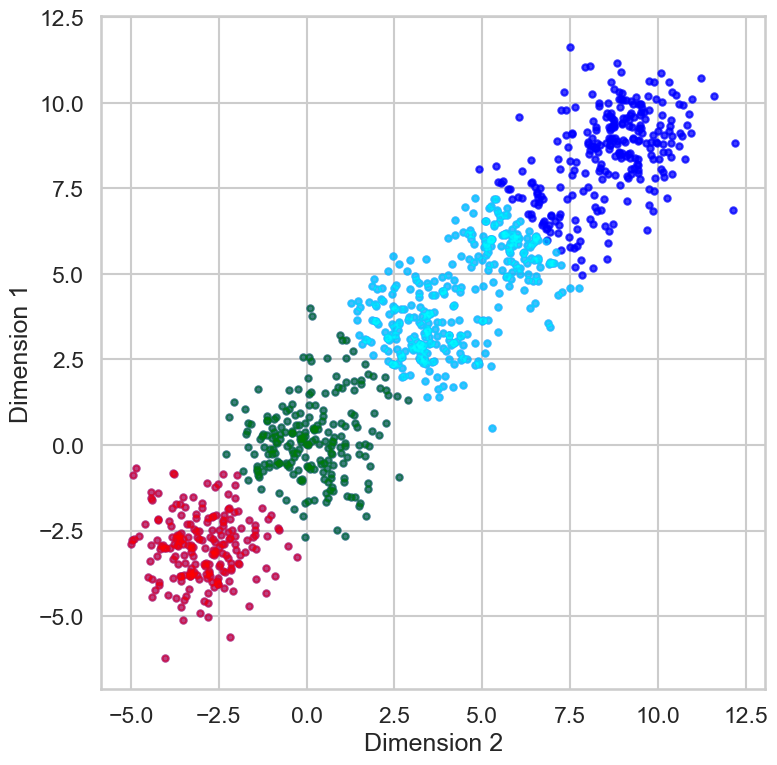

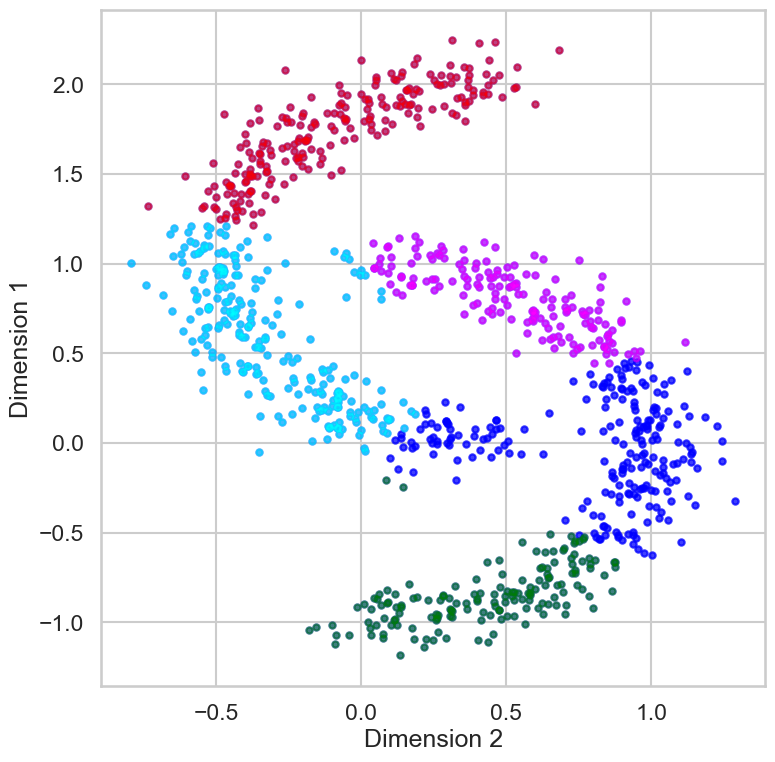

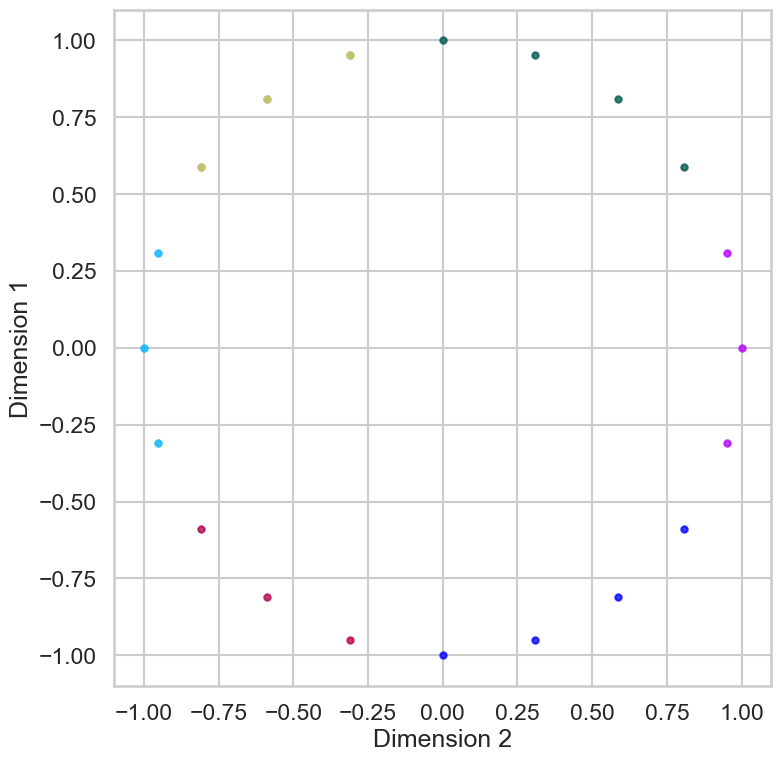

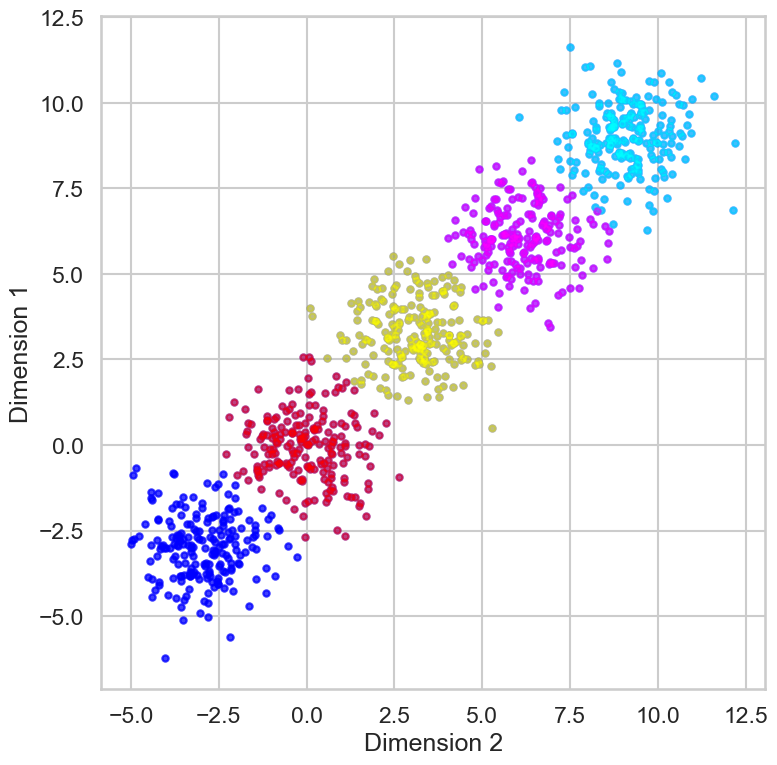

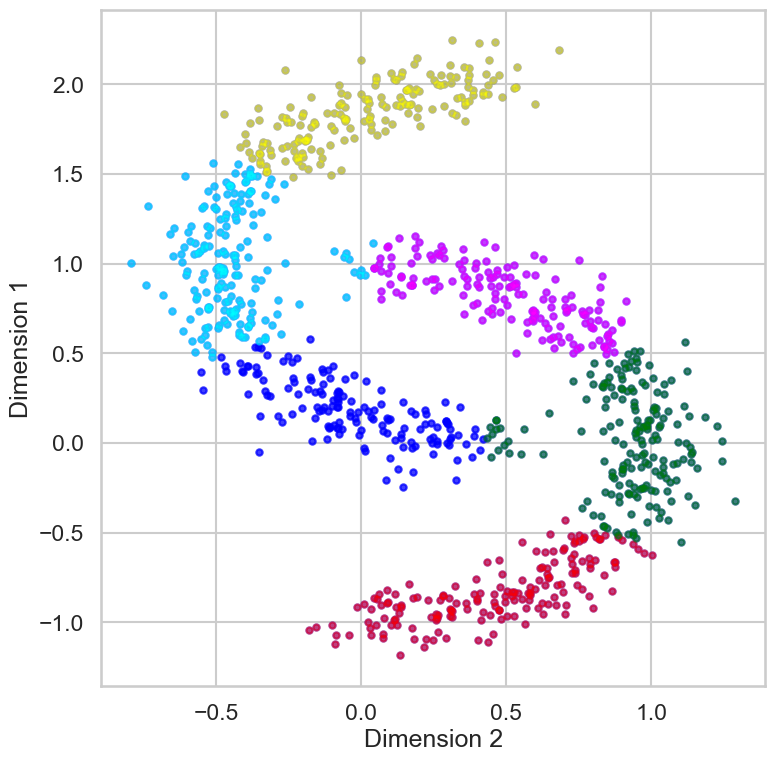

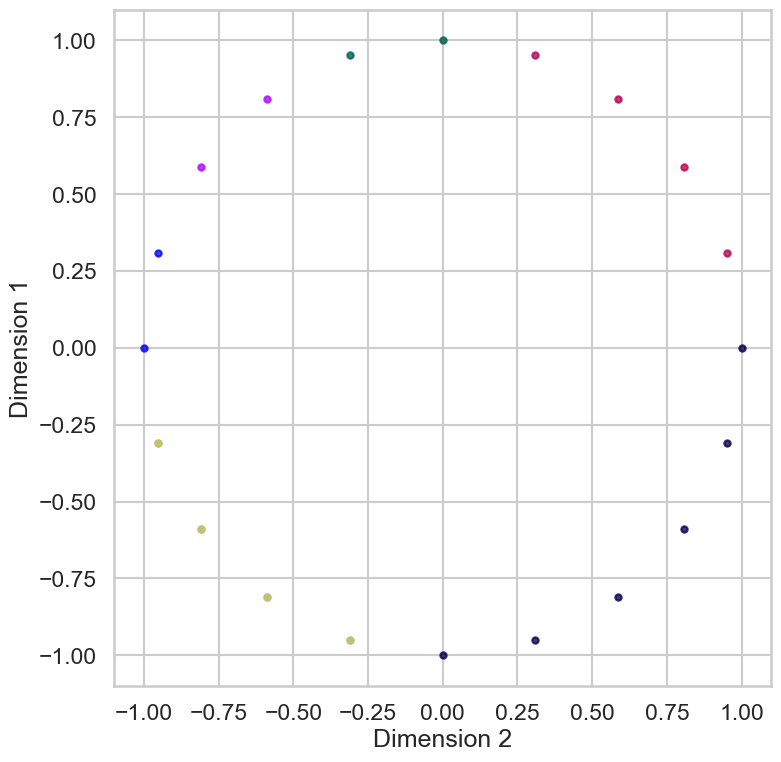

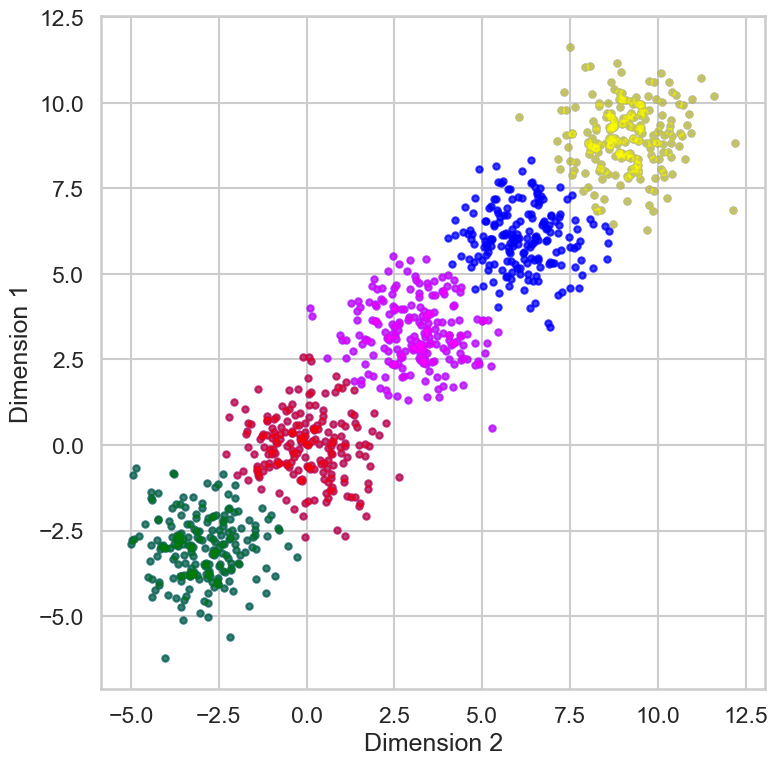

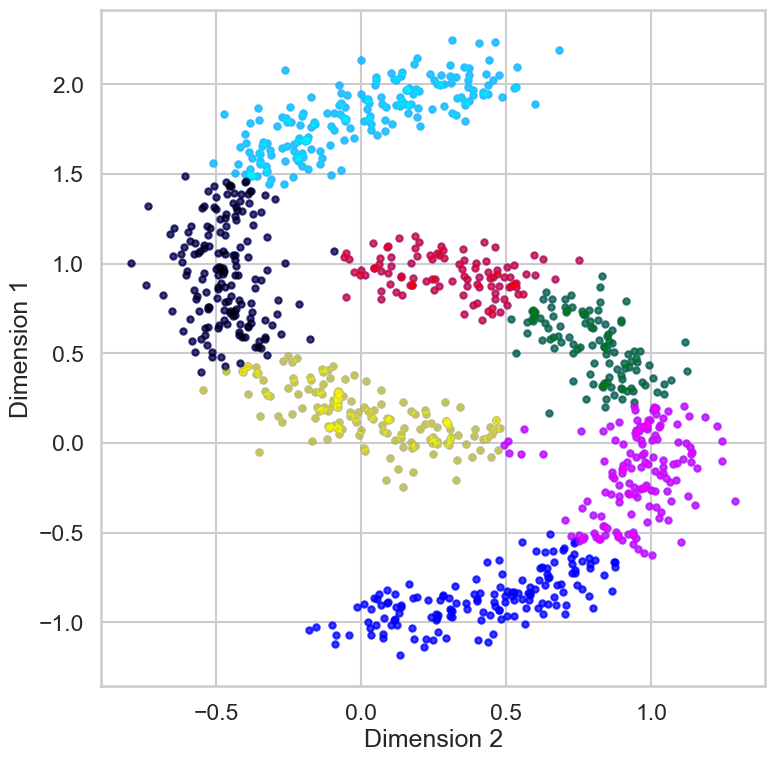

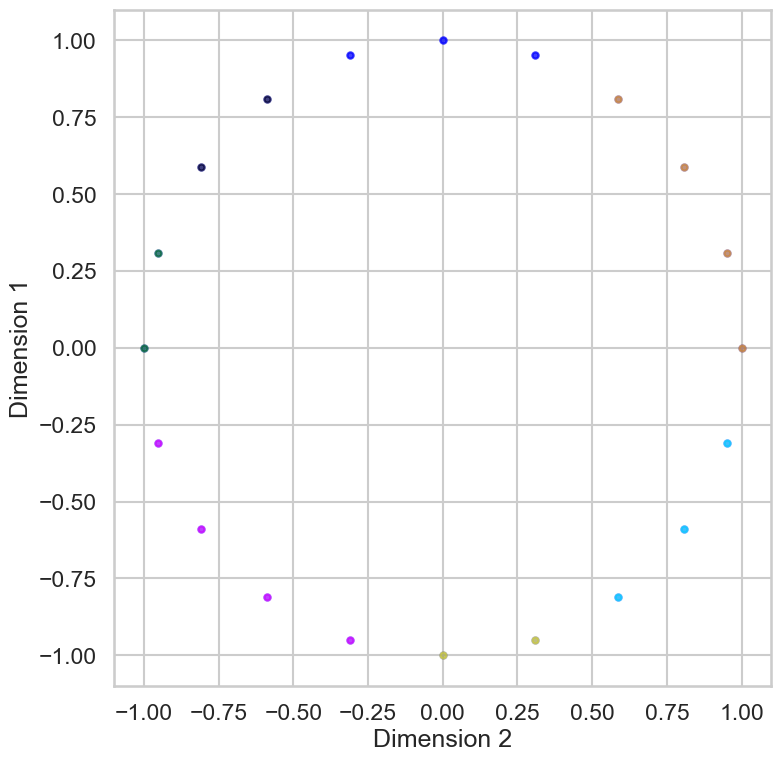

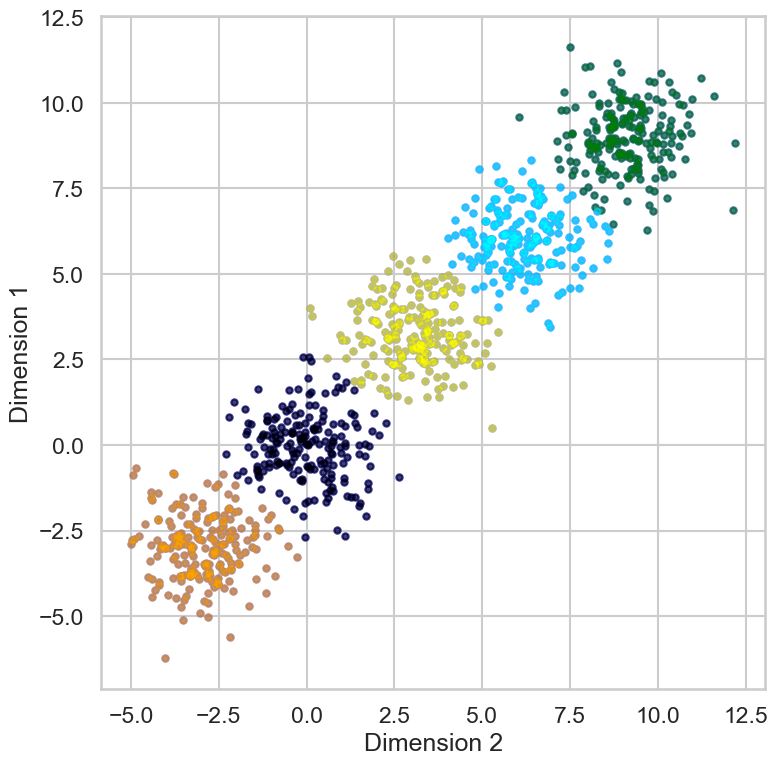

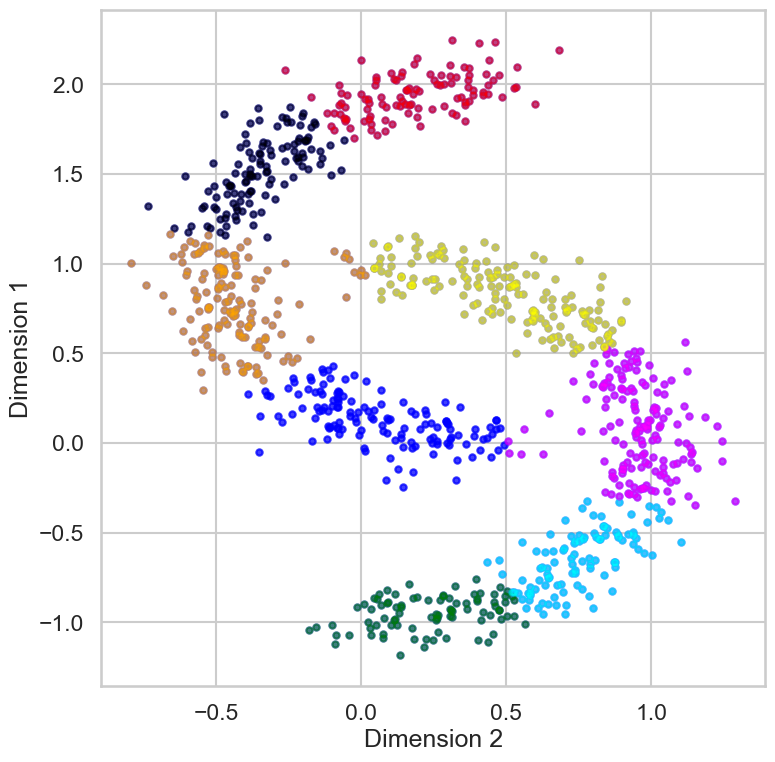

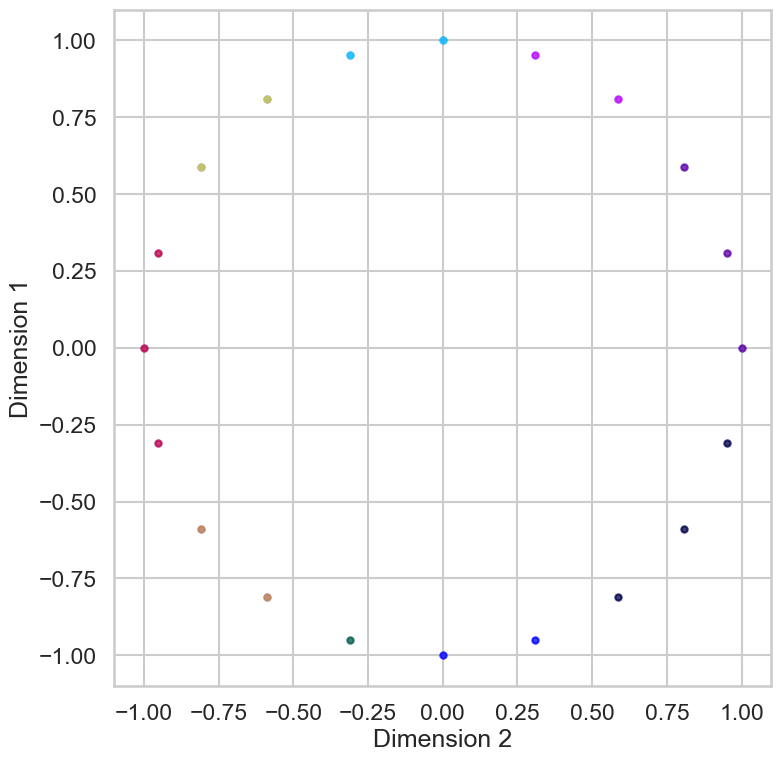

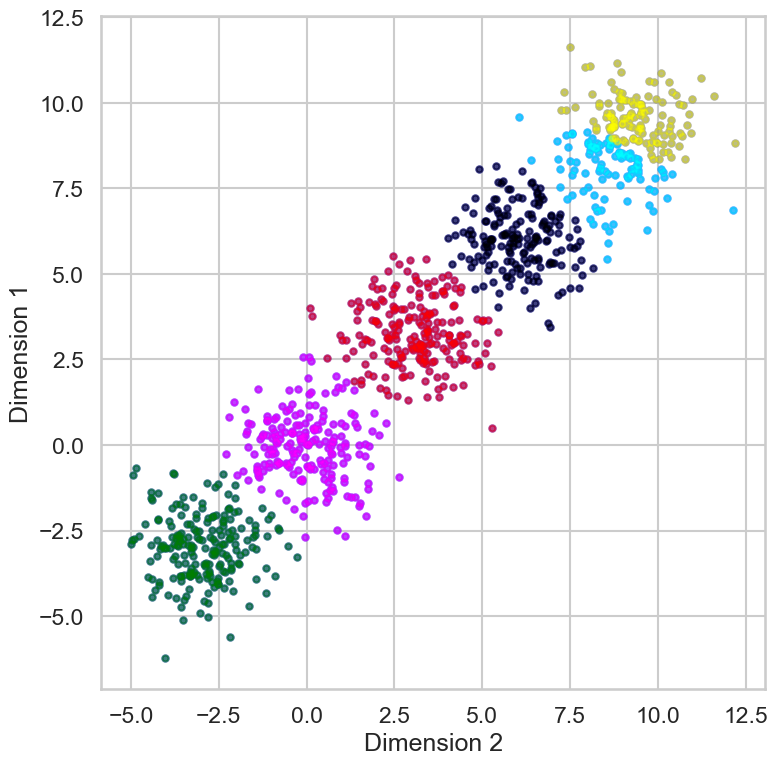

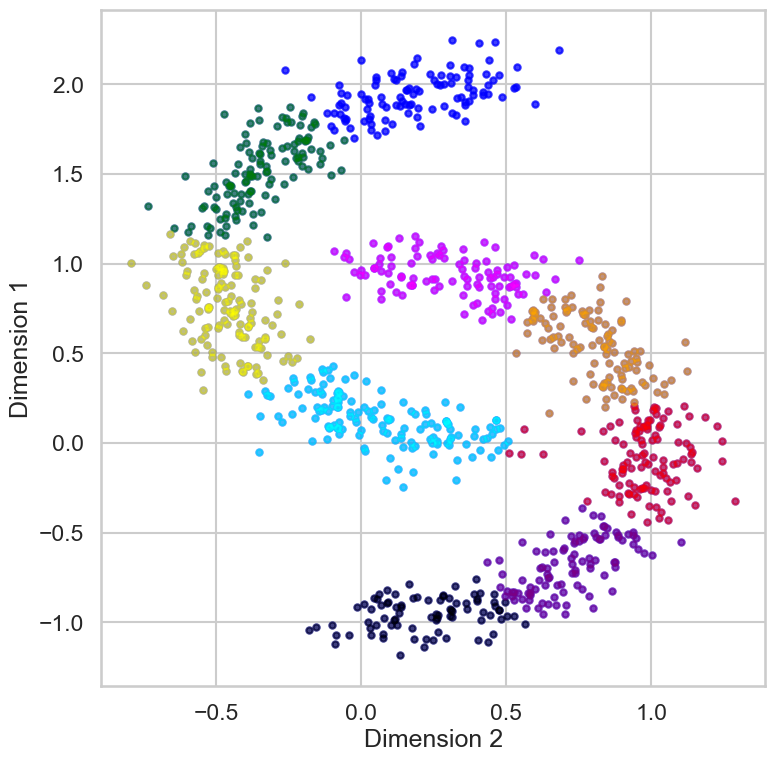

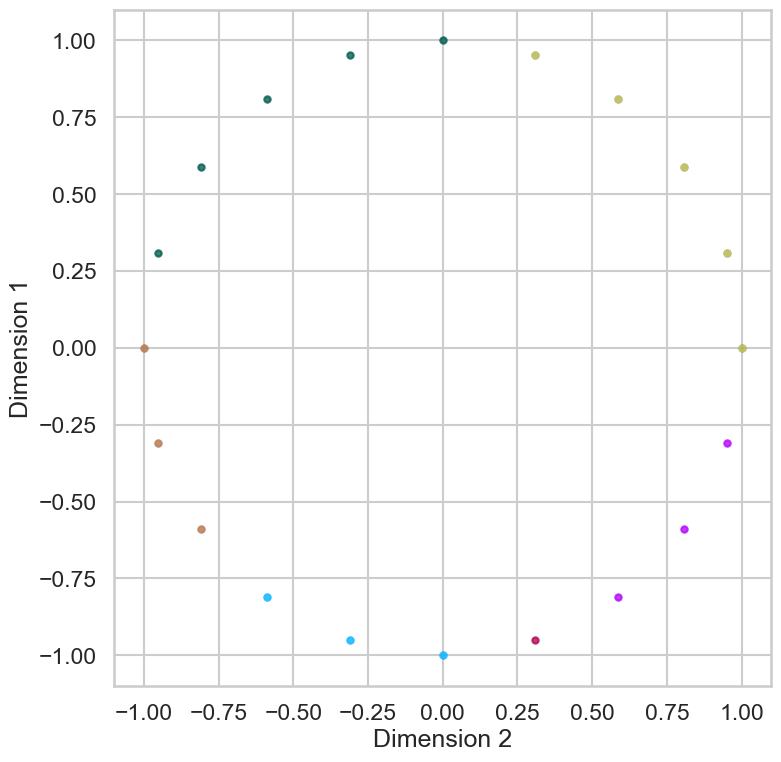

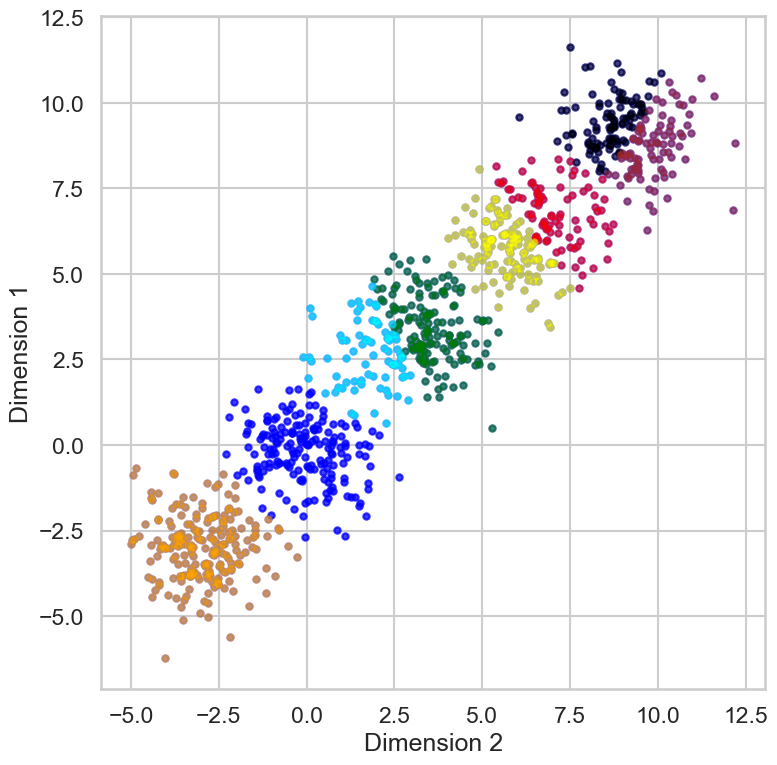

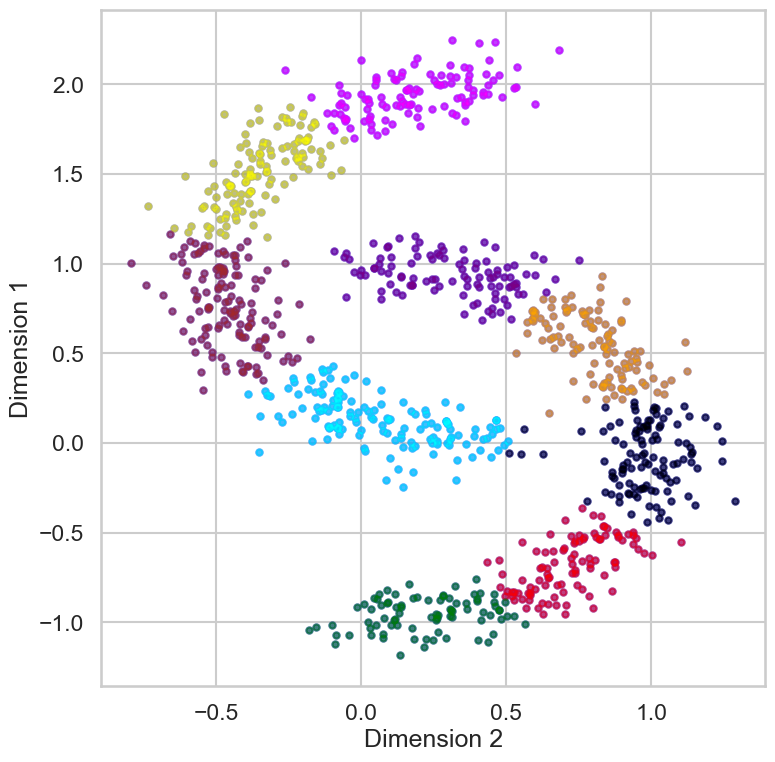

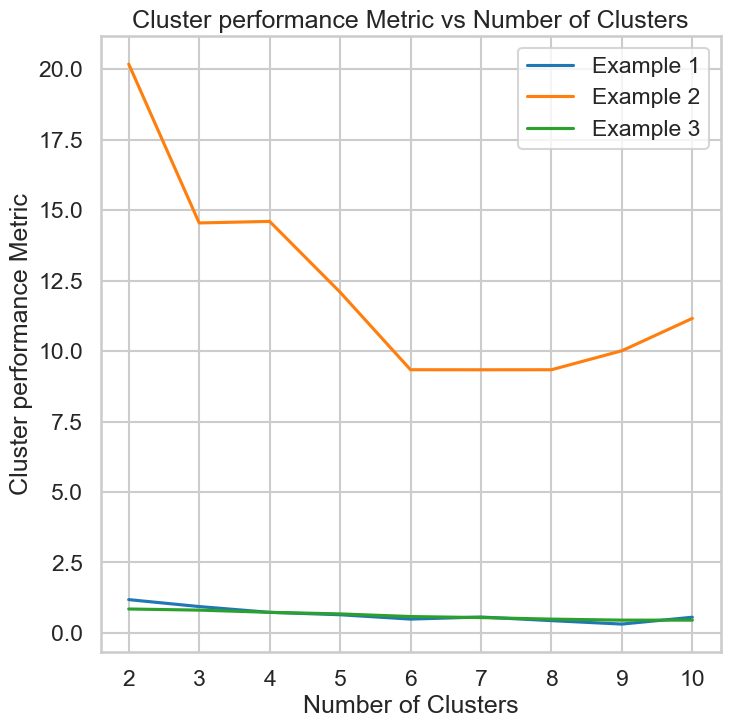

In [9]:
cluster_range = range(2, 11)
cluster_metrics_1 = []
cluster_metrics_2 = []
cluster_metrics_3 = []

for num_clusters in cluster_range:
    cluster_assignments_1, centroids_1, cluster_metric_1 = GUC_Kmean(X1, Number_of_Clusters=num_clusters, Distance_Type='euclidean')
    cluster_metrics_1.append(cluster_metric_1)
    display_cluster(X1, km=cluster_assignments_1, num_clusters=num_clusters)
    cluster_assignments_2, centroids_2, cluster_metric_2 = GUC_Kmean(X2, Number_of_Clusters=num_clusters, Distance_Type='euclidean')
    cluster_metrics_2.append(cluster_metric_2)
    display_cluster(X2, km=cluster_assignments_2, num_clusters=num_clusters)

    cluster_assignments_3, centroids_3, cluster_metric_3 = GUC_Kmean(X3, Number_of_Clusters=num_clusters, Distance_Type='euclidean')
    cluster_metrics_3.append(cluster_metric_3)

    display_cluster(X3, km=cluster_assignments_3, num_clusters=num_clusters)
plt.plot(cluster_range, cluster_metrics_1, label='Example 1')
plt.plot(cluster_range, cluster_metrics_2, label='Example 2')
plt.plot(cluster_range, cluster_metrics_3, label='Example 3')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster performance Metric')
plt.title('Cluster performance Metric vs Number of Clusters')
plt.legend()
plt.show()




## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

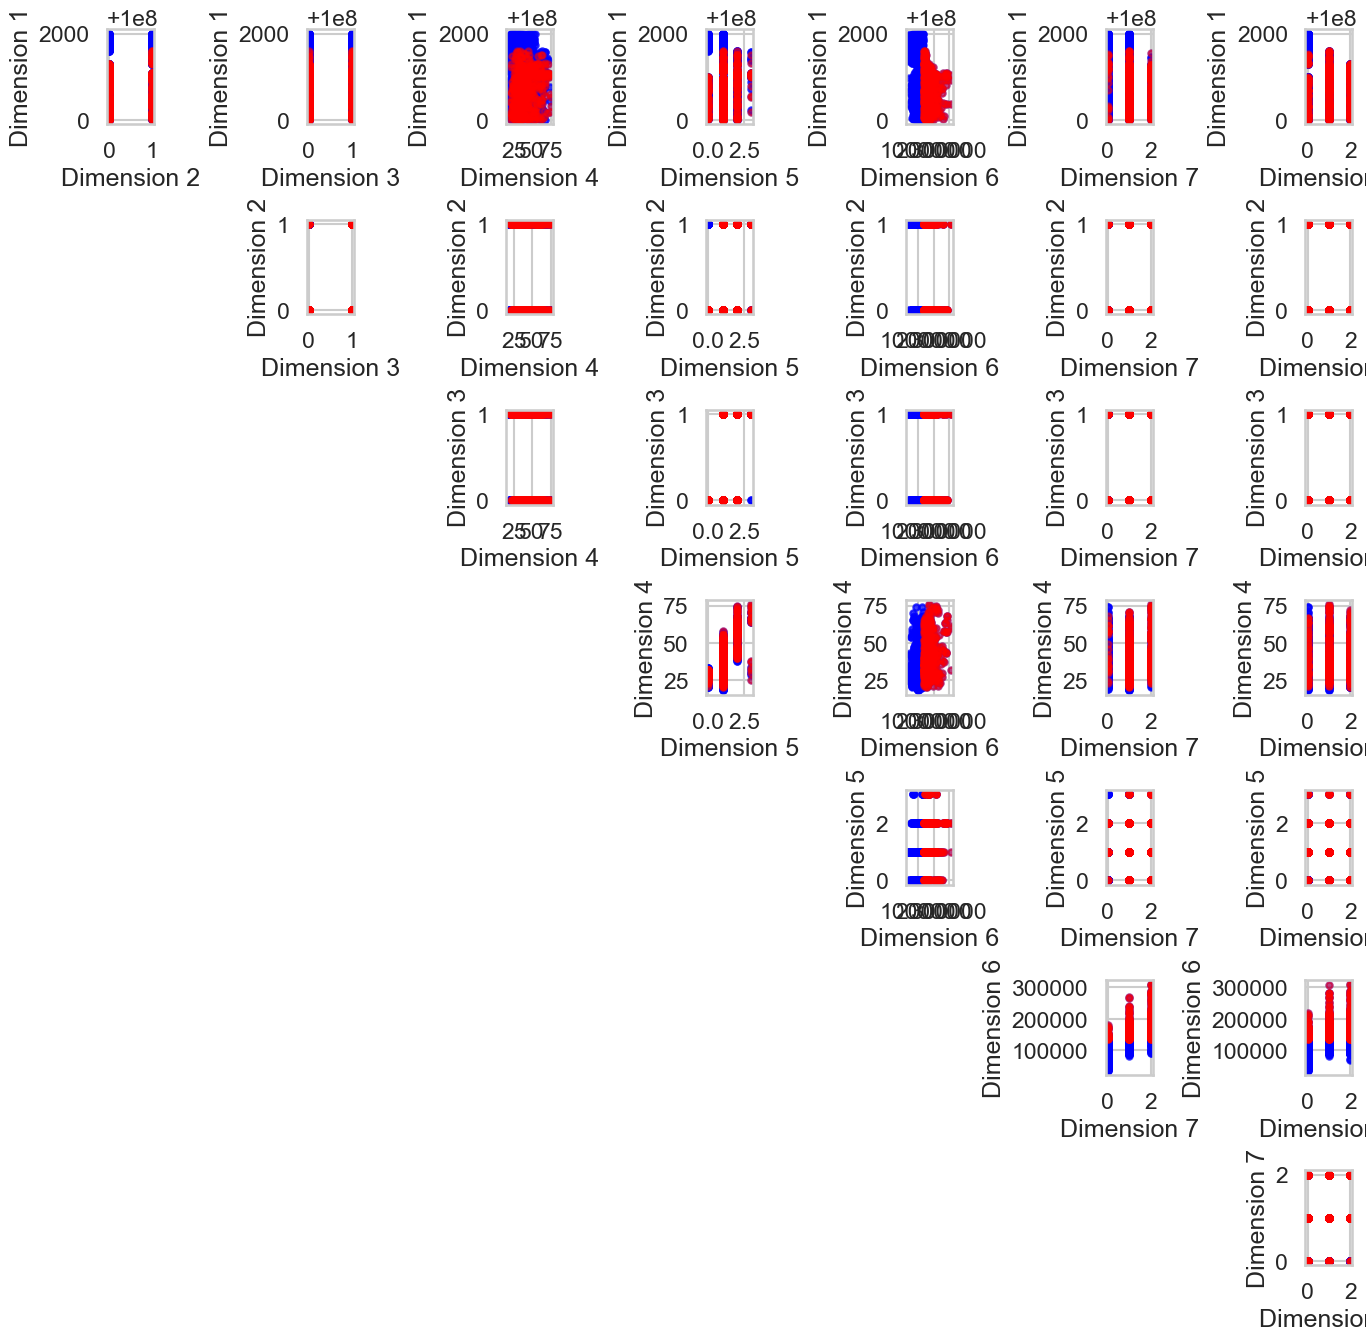

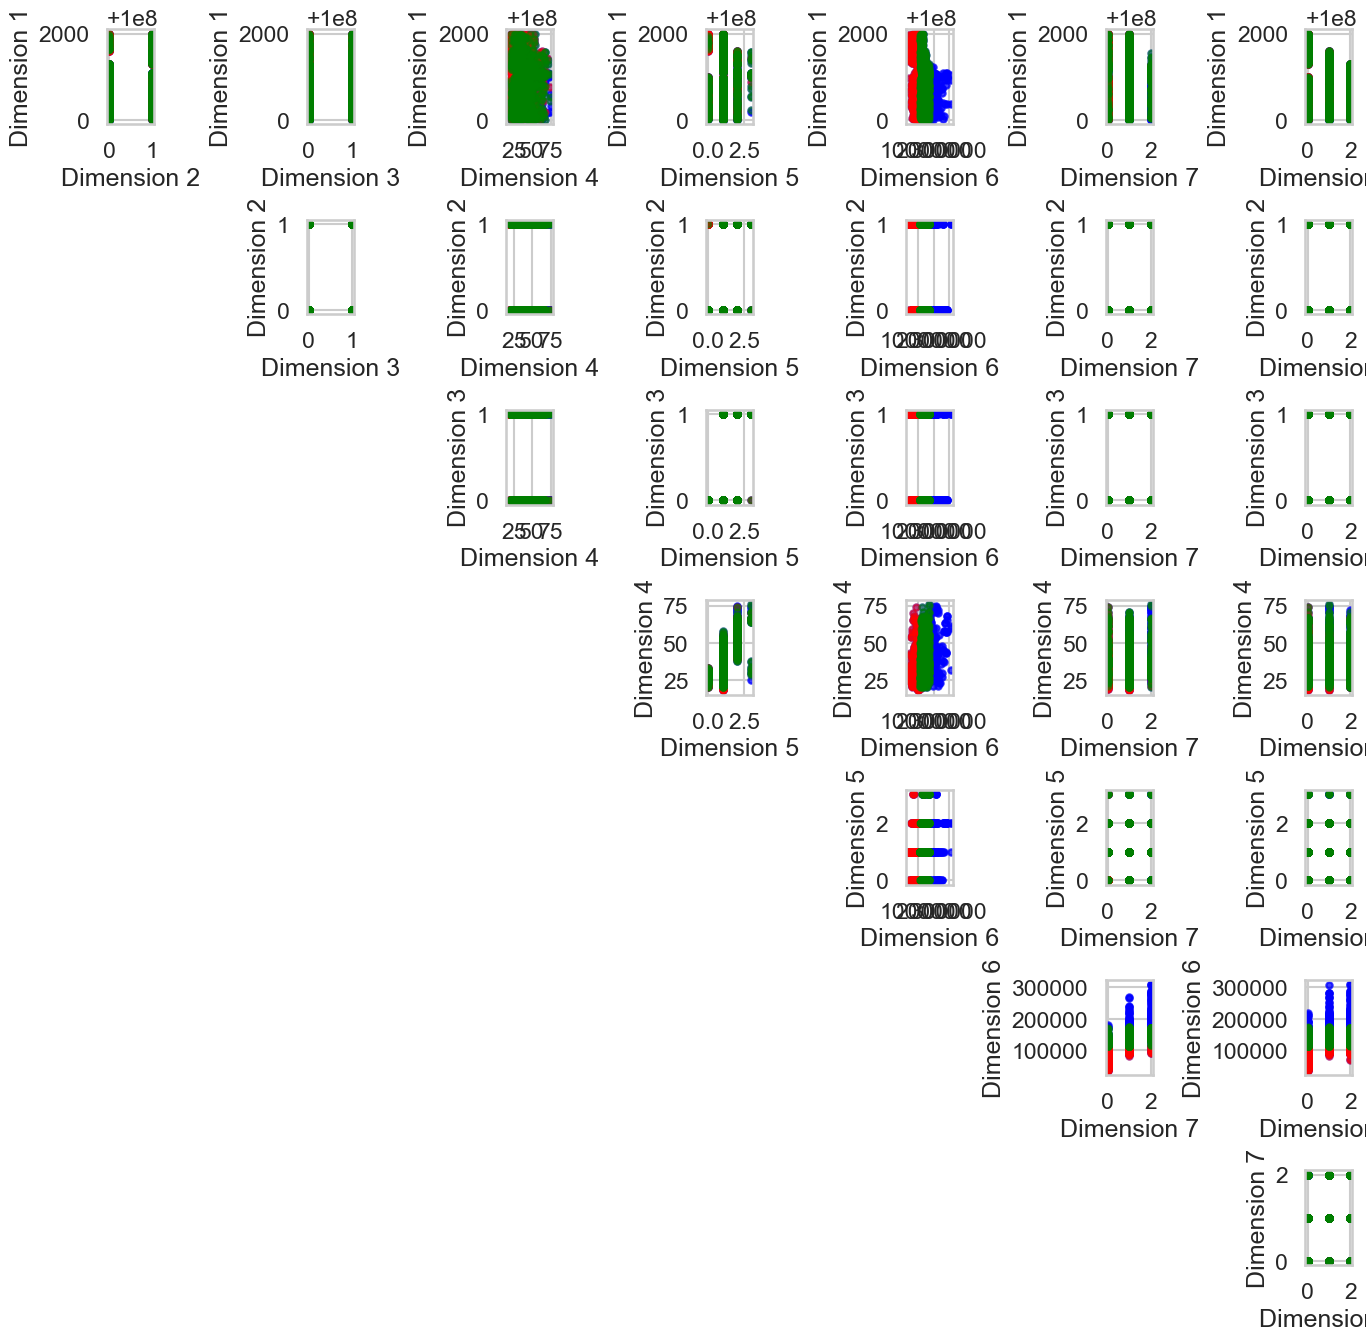

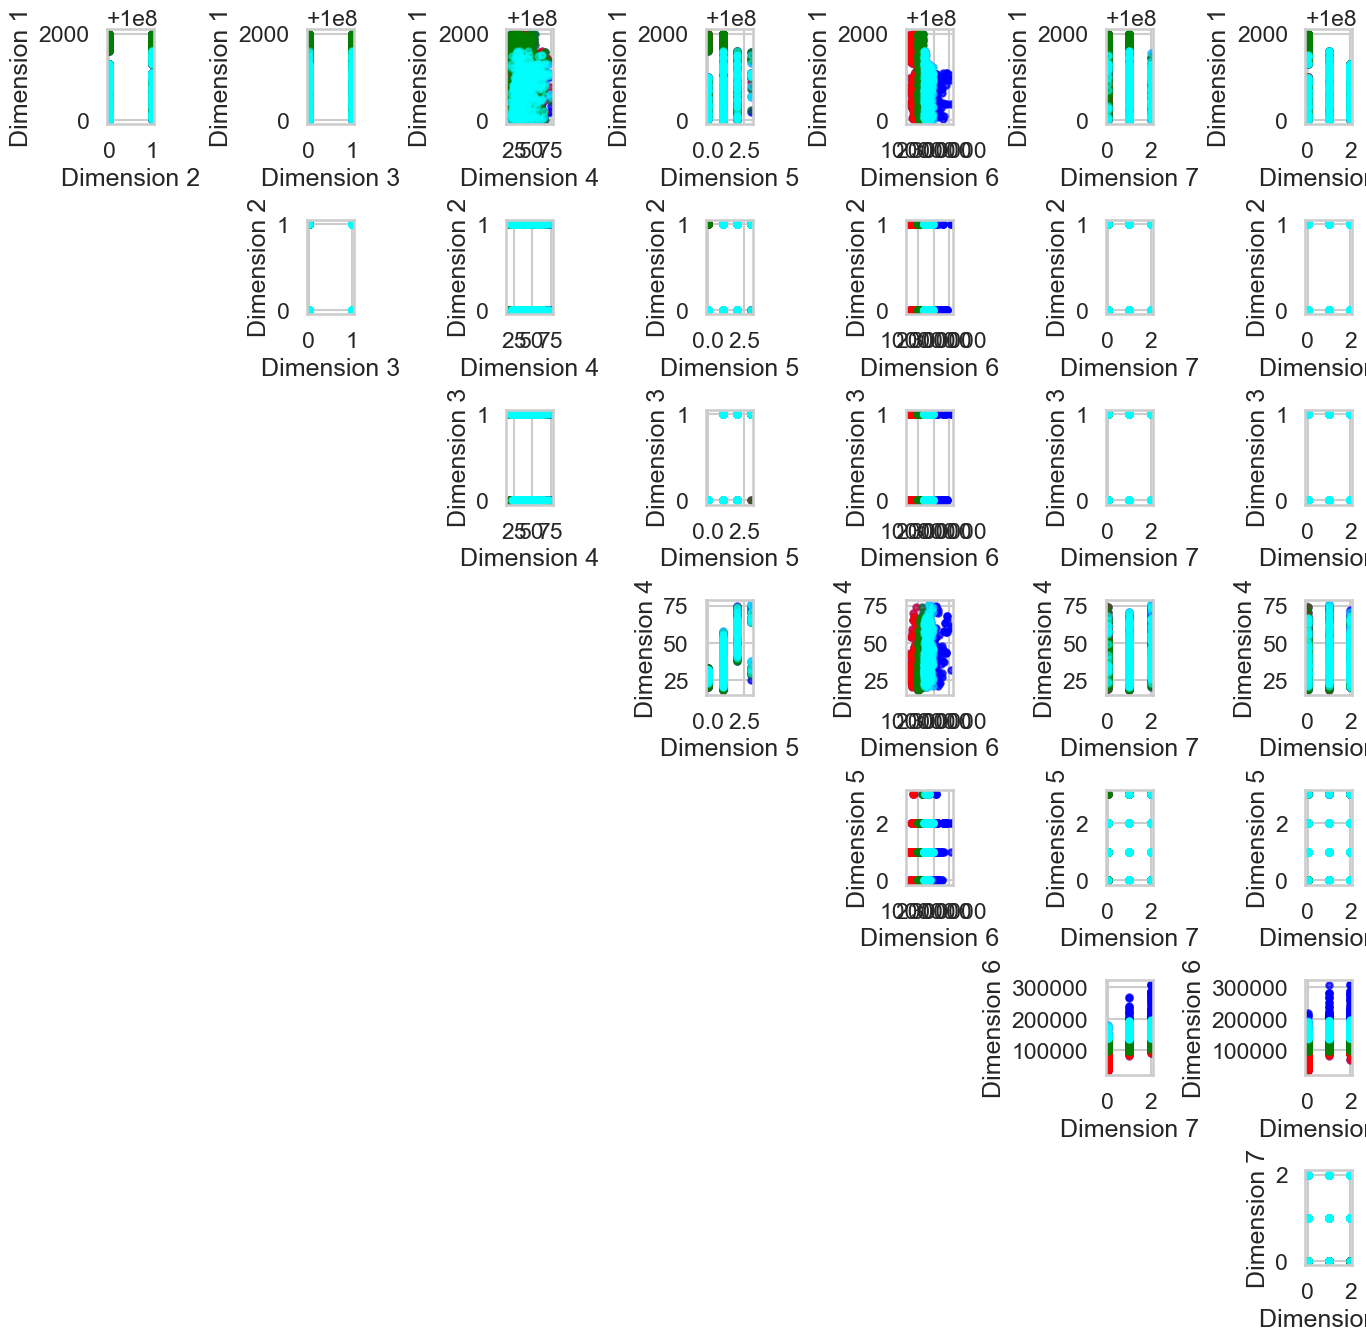

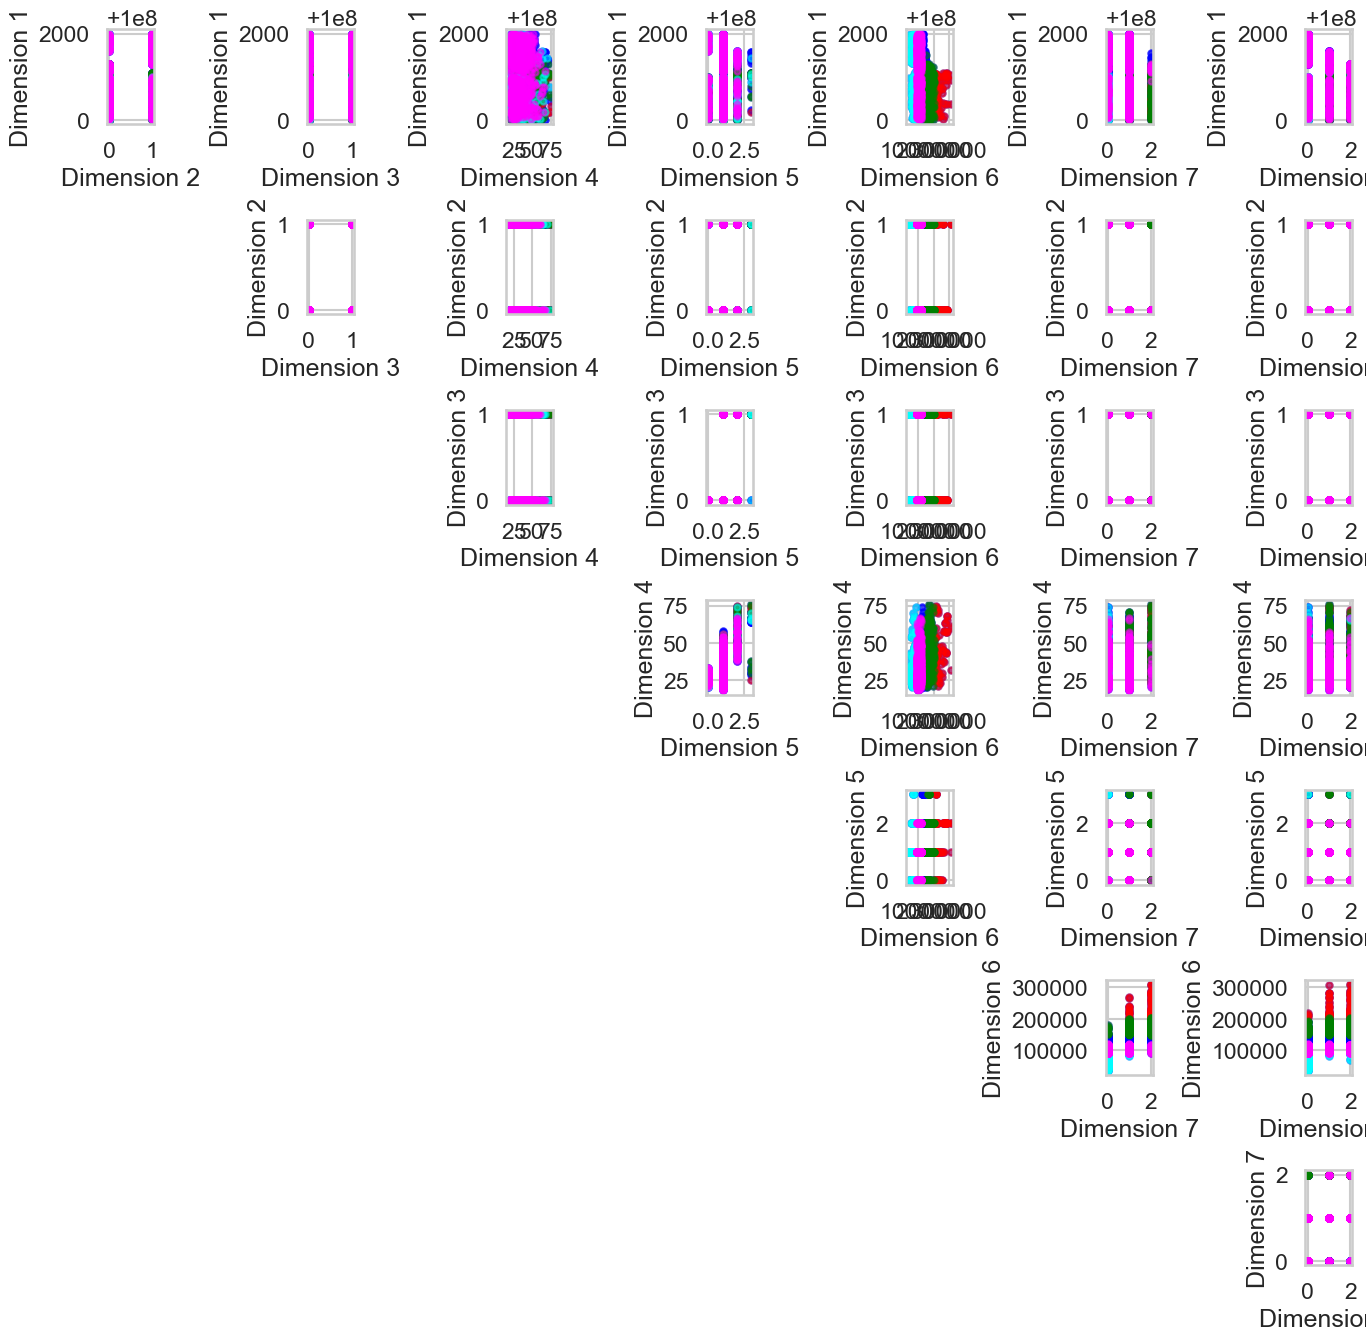

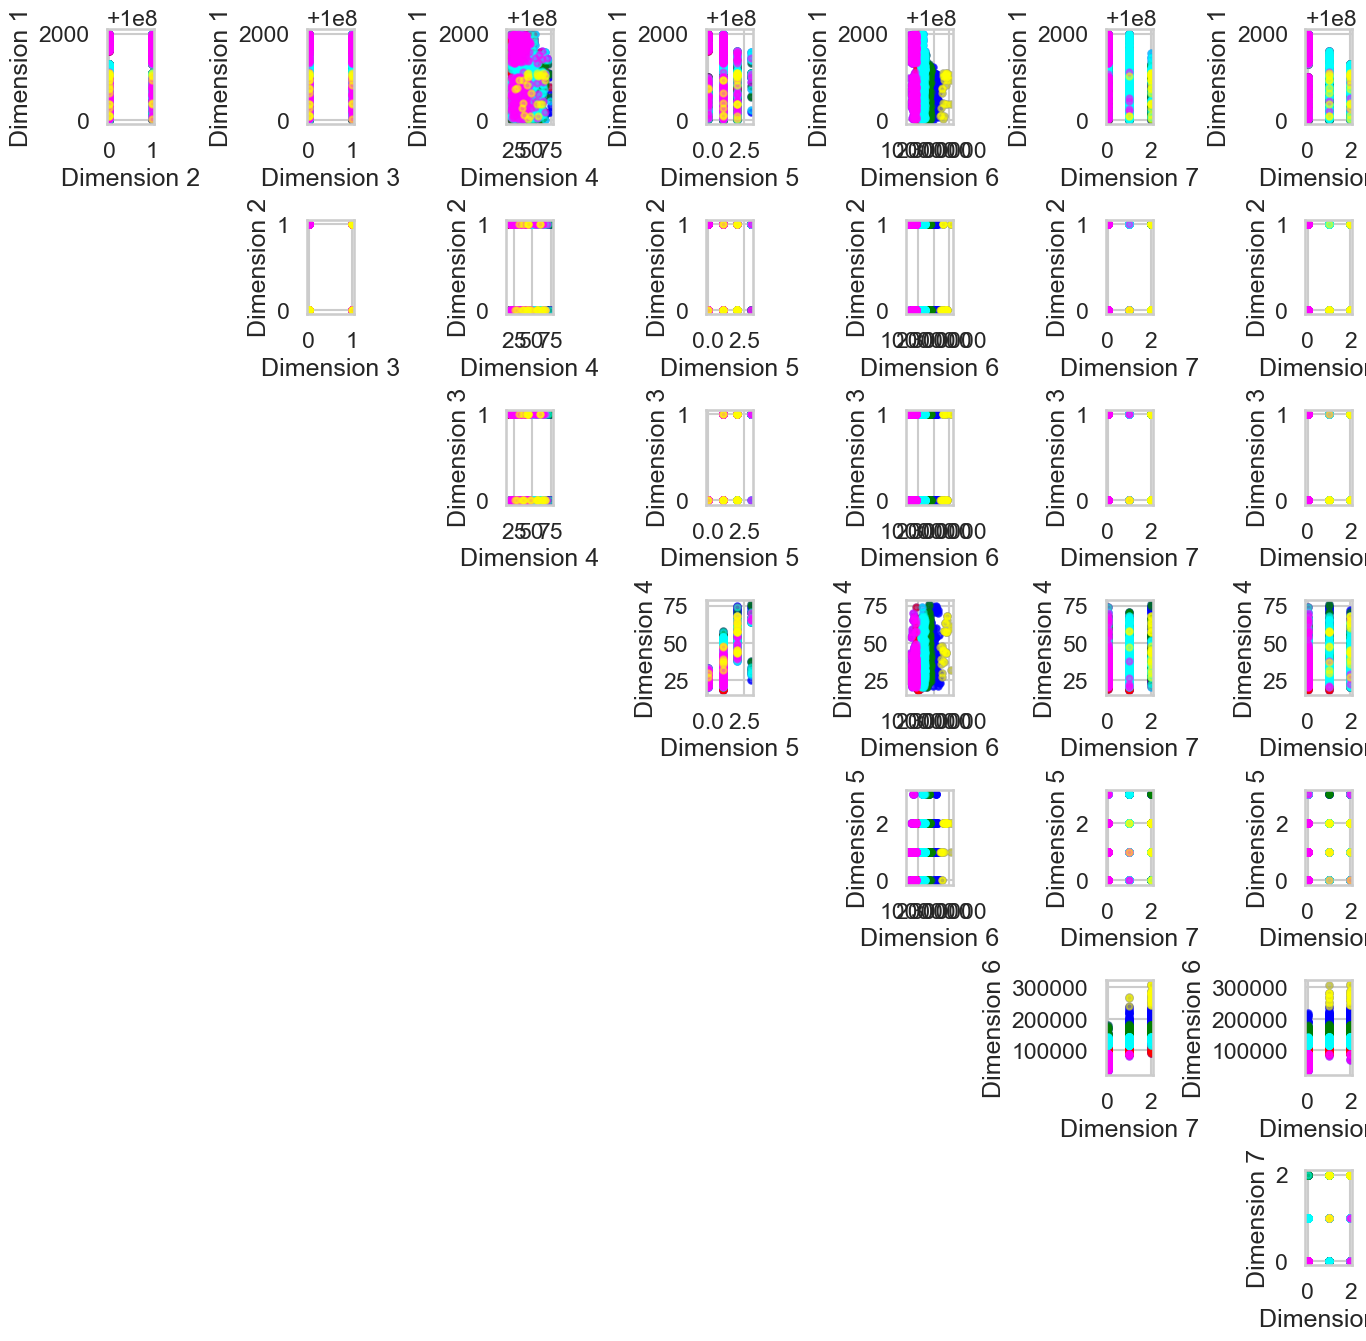

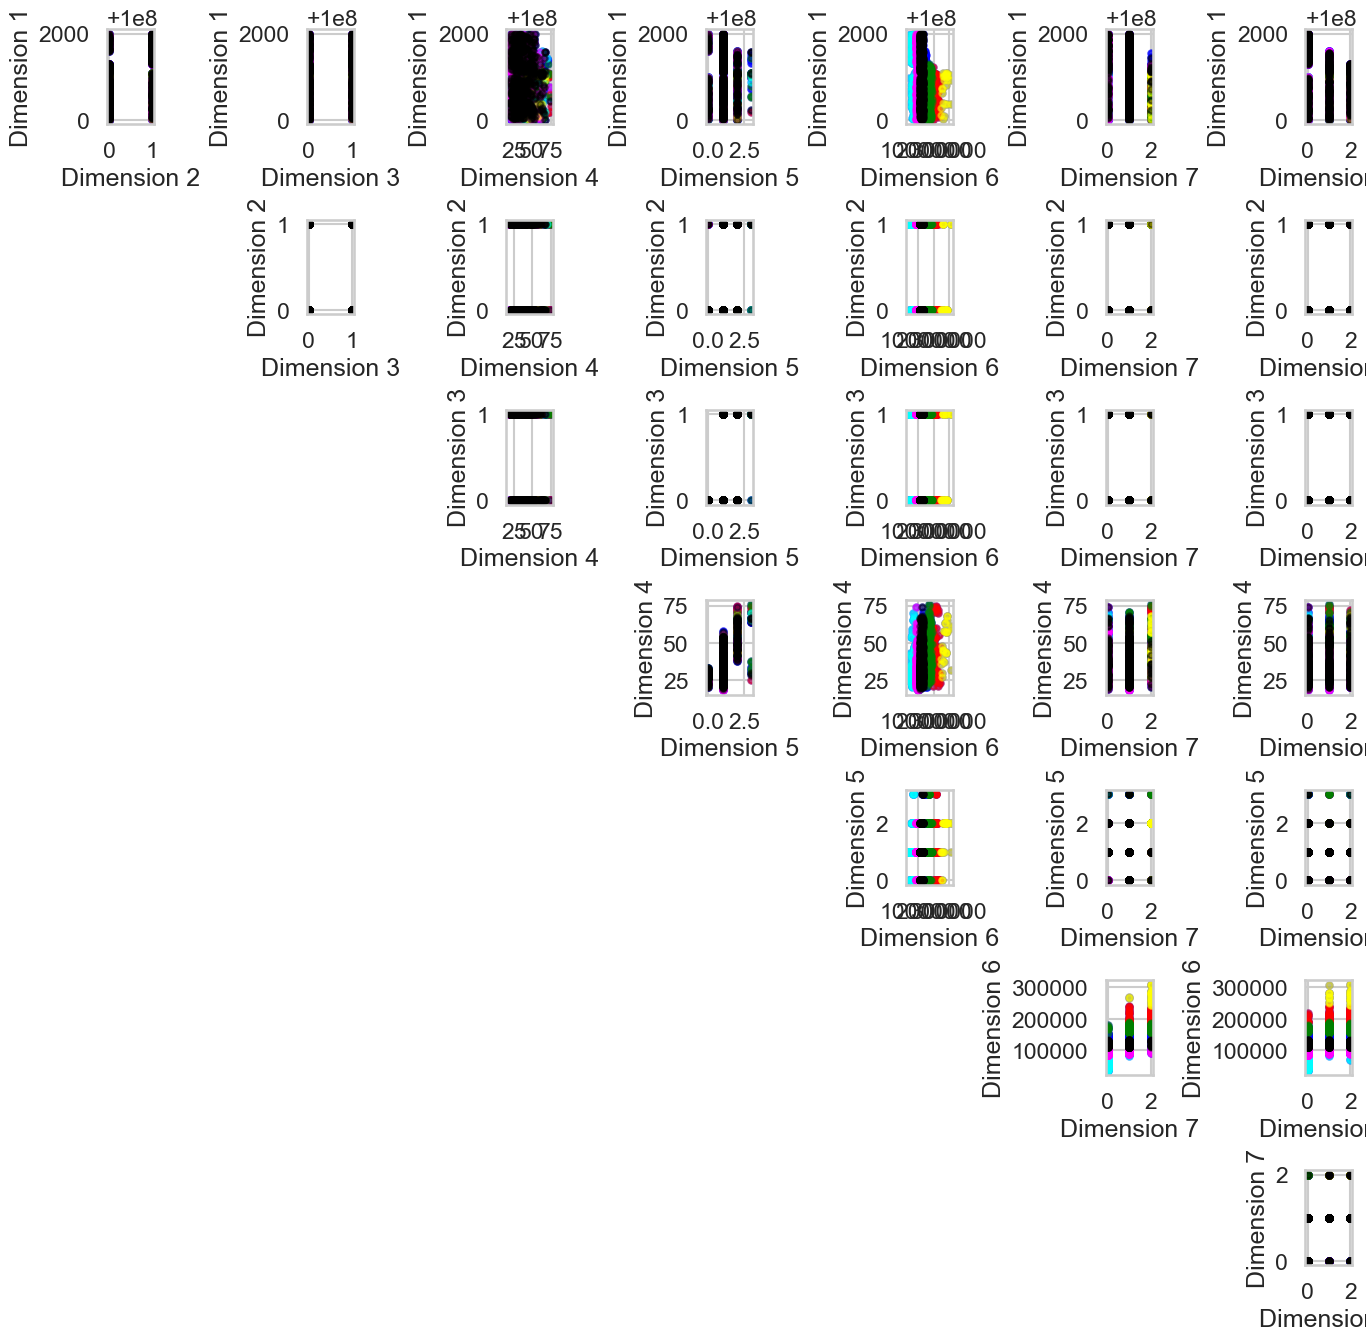

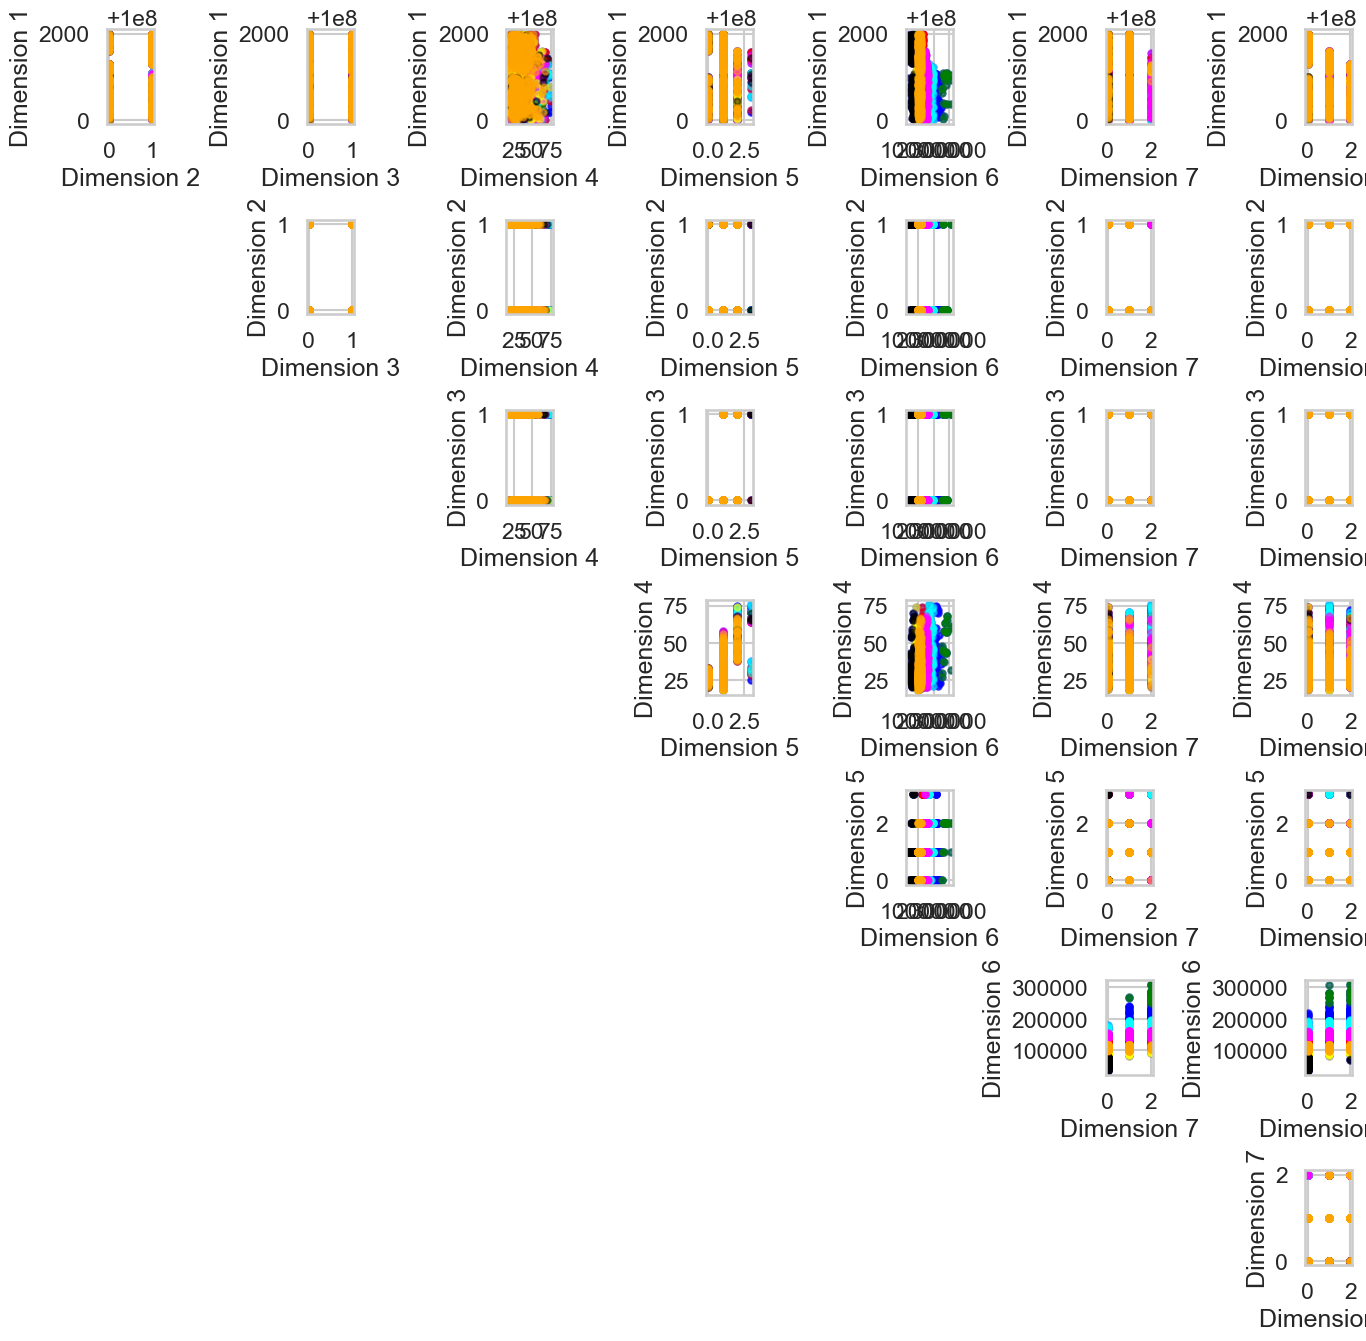

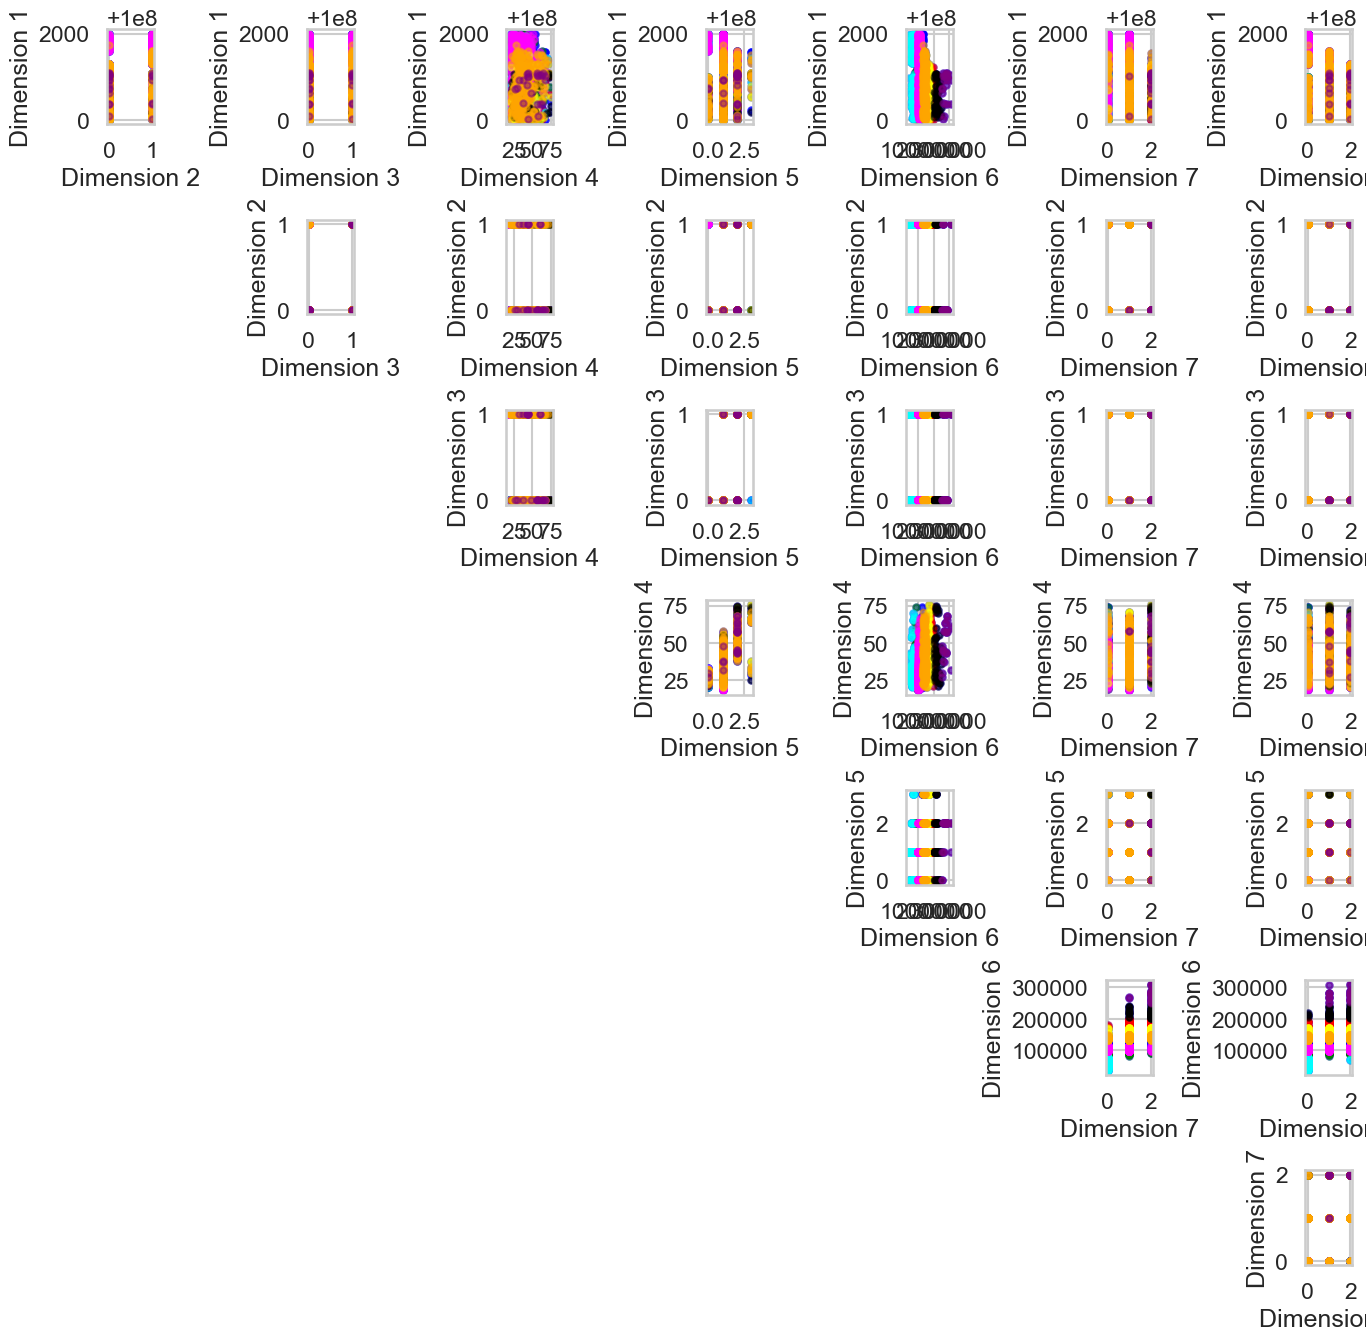

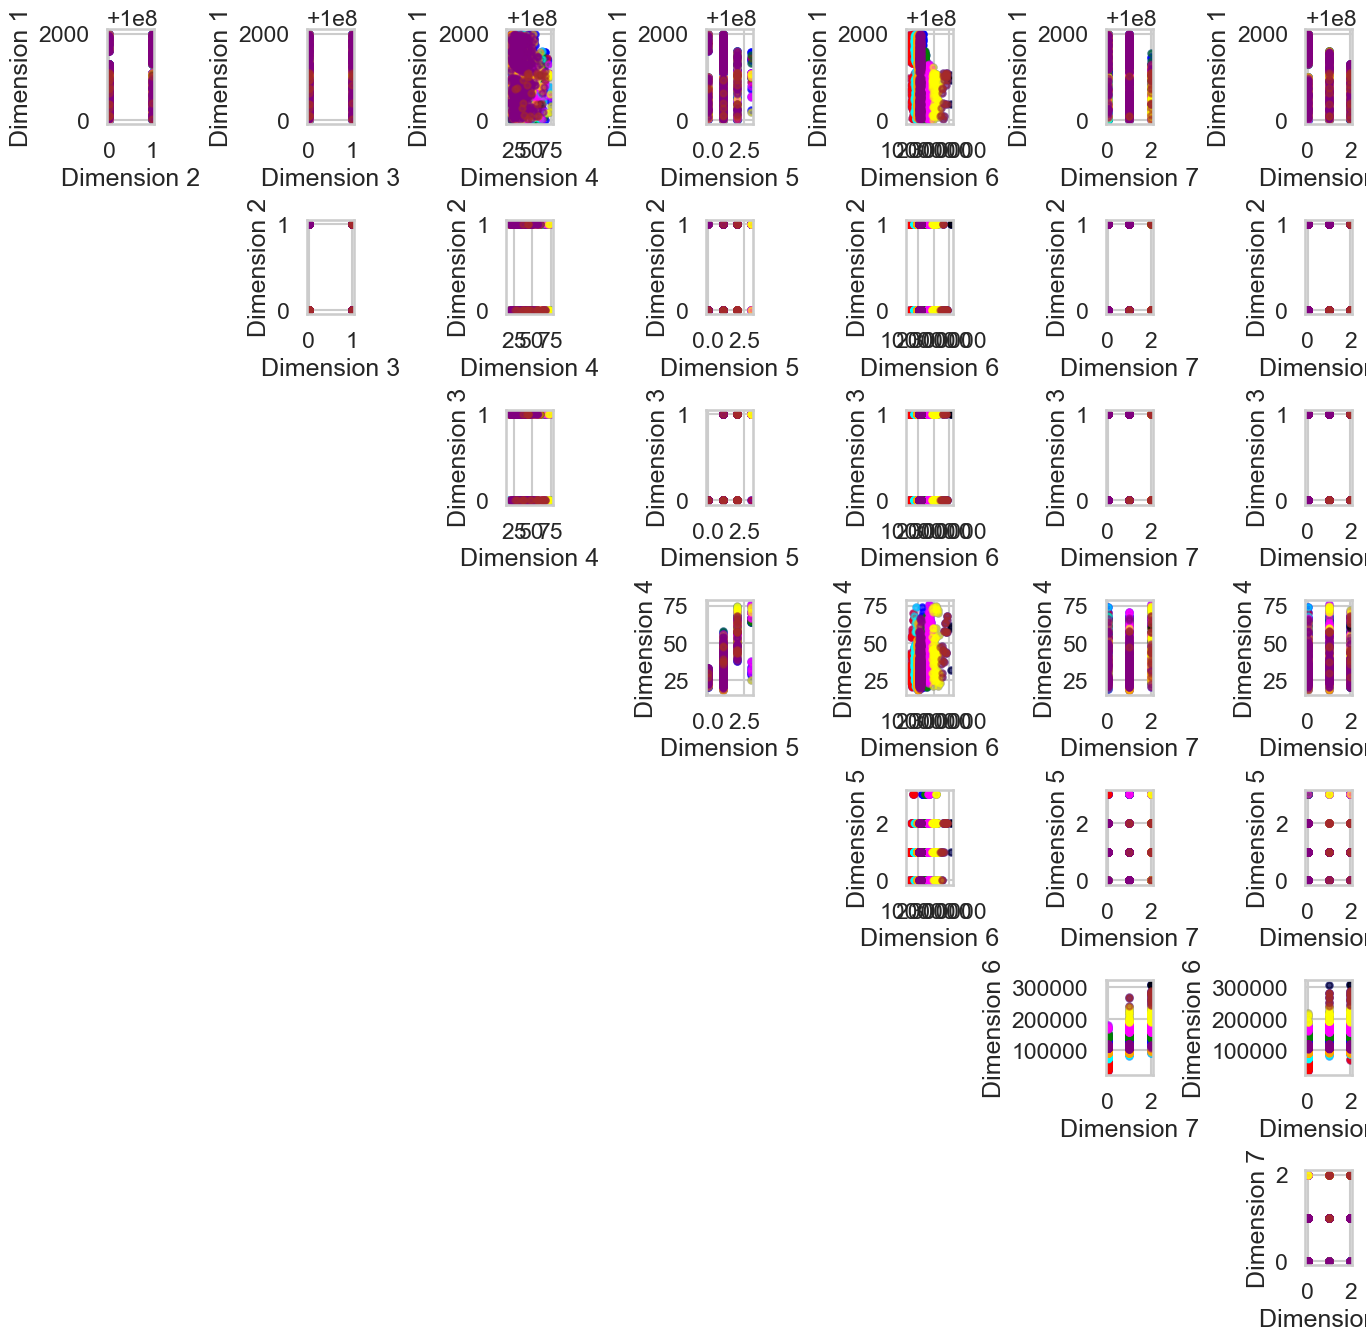

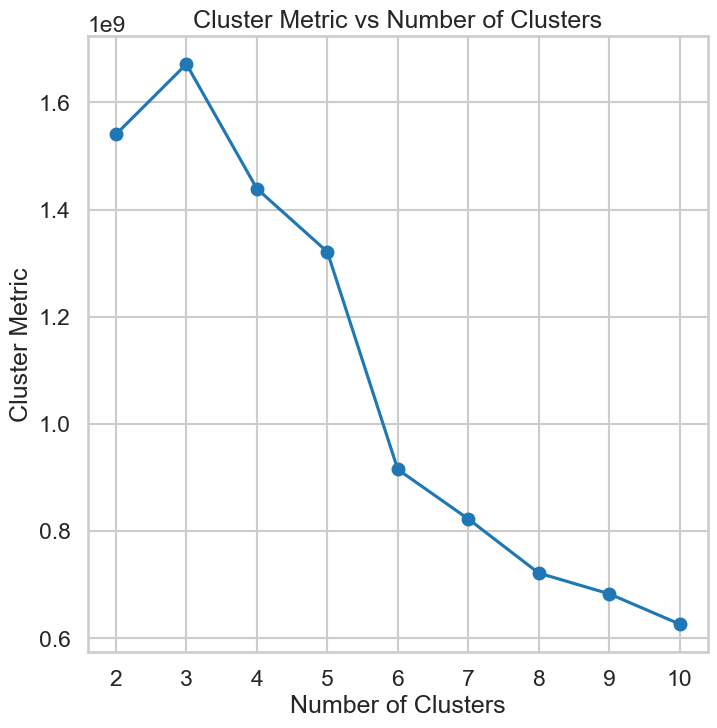

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load customer data from CSV file
customer_data = pd.read_csv('C:\\Users\\DR\\Downloads\\Assignment1_ML\\Customer_data.csv')

# Convert DataFrame to NumPy array
customer_data_array = customer_data.values

# Define the range of cluster centroids to try
cluster_range = range(2, 11)

# Initialize list to store cluster metrics for each number of clusters
cluster_metrics = []

# Apply GUC_Kmean function to the customer data with varying number of clusters
for num_clusters in cluster_range:
    # Apply GUC_Kmean function with the current number of clusters
    cluster_assignments, centroids, cluster_metric = GUC_Kmean(customer_data_array, Number_of_Clusters=num_clusters, Distance_Type='euclidean')
    # Store the cluster metric for this clustering solution
    cluster_metrics.append(cluster_metric)
    
    # Display clustered data
    display_cluster(customer_data_array, km=cluster_assignments, num_clusters=num_clusters)

# Step 4: Plot the Cluster Metric versus the number of clusters
plt.plot(cluster_range, cluster_metrics, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs Number of Clusters')
plt.grid(True)
plt.show()
